## Abstract

The analysis presented in this notebook is from a rape/sexual assault survey conducted over 6 days. The respondents predominantly identify as Whites between the Ages of 25-35. Their first choice of personal protection is a gun although slightly above half of all respondents reported carrying no weapons. Majority of respondents also admit to buying some form of protection to help protect them against an event of sexual assault. Special analysis was done on respondents that reported to have been victims and/or witnesses of sexual assault, after which correlations were drawn and conclusions inferred. Finally, on victims/witnesses that failed to report a case to the authorities, a wordcloud was plot to gain insights on the possible reasons why they chose that option.

Let's begin!

#### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (16,7)
rcParams['figure.titlesize'] = 'large'
import datetime

C:\Users\Memphis Ndego\Ana\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
#Ignores warning messages
import warnings
warnings.filterwarnings('ignore')

#### Reading the dataset from local drive

In [3]:
#Reads excel file
df = pd.read_excel('Sexual Assault Prevention Questionaire (Responses).xlsx',na_values=('NaN','Na'))

In [4]:
#Overview of the dataset
df.head()

,Timestamp,What is your current age?,Which of the categories best describe you?,How do you identify yourself?,"Do you own or carry any forms of protection in case of sexual assault, attack, or other potential harm?",Would you buy a product that would help protect you before sexual assault was to occur?,"Have you ever used any commercial DNA testing services (23andMe, Ancestry, etc)?",Have you ever been a victim of sexual assault or rape?,Have you ever witnessed assault or rape?,"If you answered ""Yes"" or ""Maybe"" to ""Have you ever been a victim of sexual assault or rape?"" or ""Have you ever witnessed assault or rape?"", did you or the victim file a police report or go to the hospital afterwards?","If you did not file a police report or go to the hospital, why?",How comfortable do you feel going to the authorities (police or hospitals) on a scale of 1 to 10 (where 1 = Very Uncomfortable to 10=Very Comfortable).
0,2019-04-17 13:38:40.860,35-45,White,Male,"No, I do not own any forms of protection.","No, I would not buy something to protect me ag...",No,No,NaN,NaN,NaN,NaN
1,2019-04-17 19:17:05.661,18-25,Asian/Pacific Islander,Female,"No, I do not own or carry any forms of protect...","Maybe, I would think about buying a product to...",No,No,No,NaN,NaN,8.0
2,2019-04-17 19:54:41.168,18-25,Asian/Pacific Islander,Female,"No, I do not own or carry any forms of protect...","Maybe, I would think about buying a product to...",No,Yes,No,"No, I nor the victim did not go to the hospit...",NaN,9.0
3,2019-04-17 16:39:57.570,18-25,Black,Female,"No, I do not own or carry any forms of protect...","Maybe, I would think about buying a product to...",No,No,No,NaN,NaN,9.0
4,2019-04-17 19:06:38.610,18-25,Other,Male,"No, I do not own or carry any forms of protect...","No, I would not buy something to protect me ag...",No,No,No,"No, I nor the victim did not go to the hospit...",NaN,5.0


First observation from the head of our dataset shows that column names are repesented in an irrational format and thus, would be too complex to deal with. As a solution, we'd rename most column names with headings that still describe its intrinsic features.

In [5]:
df.columns = ['Timestamp','Age','Race','Sex','Own_Protection','Buy_Protection','Comm_DNA','Victim','Witness',
             'File_Report','No_File_Report','Comfort']

In [6]:
#Let's confirm our new column names.
df.head(2)

,Timestamp,Age,Race,Sex,Own_Protection,Buy_Protection,Comm_DNA,Victim,Witness,File_Report,No_File_Report,Comfort
0,2019-04-17 13:38:40.860,35-45,White,Male,"No, I do not own any forms of protection.","No, I would not buy something to protect me ag...",No,No,NaN,NaN,NaN,NaN
1,2019-04-17 19:17:05.661,18-25,Asian/Pacific Islander,Female,"No, I do not own or carry any forms of protect...","Maybe, I would think about buying a product to...",No,No,No,NaN,NaN,8.0


Below has the description of new column names:

* Timestamp: Time of filling the Questionnaire
* Age: The age range of the respondent
* Race: The racial classification of respondent
* Sex: Gender of respondent
* Own_Protection: Desribes if a respondent owns/carries any form of protection in case of sexual assault, attack, or other potential harm
* Buy_Protection: Describes if a respondent would buy a product that would help protect him/her before sexual assault was to occur
* Comm_DNA: Describes if a respondent has ever used any commercial DNA testing services (23andMe, Ancestry, etc)
* Victim: Describes if a respondent has been a victim of sexual assualt or rape
* Witness: Describes if a respondent has ever witnessed an assault or rape
* File_Report: Describes if a respondent filed a report at a station or hospital having been a victim/witness of sexual assault or rape
* No_File_Report: Describes why a respondent did not file a report at a station or hospital having been a victim/witness of sexual assault or rape
* Comfort: Decribes how comfortable a respondent feels going to report to the authorities (Police or Hospitals)

Lot better! Let's know more about the columns and their corresponding data types.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 12 columns):
Timestamp         1004 non-null datetime64[ns]
Age               1004 non-null object
Race              1004 non-null object
Sex               1004 non-null object
Own_Protection    1004 non-null object
Buy_Protection    1004 non-null object
Comm_DNA          1004 non-null object
Victim            1004 non-null object
Witness           1003 non-null object
File_Report       444 non-null object
No_File_Report    227 non-null object
Comfort           1003 non-null float64
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 94.2+ KB


Survey has 1004 entries. We would also notice that some columns do not have up to that amount. One of which is the File_Report column which should only be filled if respondent has been a victim and/or witness of sexual assault or rape. Another, is the No_File_Report column which should also be filled by repondents that have been victim and/or witness to rape, but did not file a report.

In the light of the above, analysis on this data would be divided into 3:
* Part 1: Overall analysis. Here, analysis is basically done to identify trends/characteristics of respondents that took part in the survey. Knowing well that not all respondents that partook have been victims and/or witnesses to rape or sexual assault. 
* Part 2: Analysis with respect to File_Report column. Here, analysis is more streamlined to get trends/characteristics/information on respondents that have been a victim and/or witness to rape or sexual assault and actually ended up filing a report.
* Part 3: Analysis on the No_File_Report column. Here, analysis is concentrated on respondents that have been a victim and/or witness to rape or sexual assault but did not file a report. Trends and characteristics as to why they did not file a report would be identified.

It should also be stated that for each above, univariate and bivariate analysis would be done on all columns.

## Table Of Content
1  [Part 1: Overall Survey Analysis](#first-bullet)
*  [Preliminary](#f0)
*  [Timestamp](#f1)
*  [Age](#f2)
*  [Race](#f3)
*  [Sex](#f4)
*  [Own Protection](#f5)
*  [Buy Protection](#f6)
*  [Commercial DNA Testing Service](#f7)
*  [Victim](#f8)
*  [Witness](#f9)
*  [Comfort](#f10)

2  [Part 2: Victims and/or Witnesses Analysis](#second-bullet)
*  [Preliminary](#s0)
*  [Age](#s1)
*  [Race](#s2)
*  [Sex](#s3)
*  [Own Protection](#s4)
*  [Buy Protection](#s5)
*  [Commercial DNA Testing Service](#s6)
*  [Comfort](#s7)
*  [File Report](#s8)

3  [Part 3: No File Report Analysis](#third-bullet)
*  [Preliminary](#t0)
*  [Age](#t1)
*  [Race](#t2)
*  [Sex](#t3)
*  [Natural Language Processing](#t4)
    *  [Text Pre-Processing](#t41)
    *  [WordCloud](#t42)


# Part 1: Overall Survey Analysis  <a class="anchor" id="first-bullet"></a>

This section of the analysis would be considering the survey in totality. Insights including race, age group, or gender with the most entry would be gotten. Causations, correlations, tabulations amongst other interesting facts would also be identified.

### Preliminary <a class="anchor" id="f0"></a>

Let's start by defining some necessary functions.

In [8]:
#Function calls a column name and outputs the number of unique elements and the unique elements.
def func(col):
    col in df.columns
    unique = df[col].unique()
    num_unique = df[col].nunique()
    print('Number of Unique Elements in {}: {}'.format(col,num_unique))
    print('Unique Elements in {}: {}'.format(col,unique))

In [9]:
"""Function calls a column name and outputs the length of the column, 
value count of each unique element (%) in that column, and its corresponding countplot."""
def plot(col):
    col in df.columns
    length = len(df[col])
    val_count_norm = df[col].value_counts(normalize=True).apply(lambda x:str(round((x*100),2))+'%')
    plt.figure(figsize=(16,7))
    plot = sns.countplot(x=df[col])
    plt.title(col, fontsize = 20)
    print('Length of DataFrame: {}'.format(length))
    print(50*'-')
    print('Value Counts in Percentage of Unique Elements in {}:\n{}'.format(col,val_count_norm))
    return plot

In [10]:
"""Function calls a column name and another column name (for comparison - hue)
to output a comparison table (cross tabulation) between columns, and their corresponding countplot."""
def plot_hue(col, hue):
    cross_tab=pd.crosstab(df[col],df[hue],normalize=True).apply(lambda x:round((x*100),2).astype(str)+'%')
    cross_df = pd.DataFrame(data=cross_tab.values,index=cross_tab.index,columns=cross_tab.columns)
    plt.figure(figsize=(16,7))
    plot = sns.countplot(x=df[col],hue=df[hue])
    plt.title('{} VS {}'.format(col,hue) , fontsize = 20)
    plt.legend(loc=0)
    print('Comparison Table: {} VS {}'.format(col,hue))
    return cross_df
    return plot

We would treat each column individually by calling these functions to get possible insights.

### Timestamp <a class="anchor" id="f1"></a>

In [11]:
#Converting the datetime column
year = df['Timestamp'].dt.year.unique()
month = df['Timestamp'].dt.strftime('%B').unique()
dayofweek = df['Timestamp'].dt.strftime('%A'','' ''%d').unique()
for y in year:
    for m in month:
        for w in dayofweek:
            print('{} {} {}'.format(w,m,y))

Wednesday, 17 April 2019
Thursday, 18 April 2019
Friday, 19 April 2019
Saturday, 20 April 2019
Sunday, 21 April 2019
Monday, 22 April 2019


From the timestamp column, we are able to tell that the survey was carried out for 6 days - from Wednesday, 17th of April 2019 to Monday, 22nd of April 2019.

In [12]:
#Applying the newly adjusted datetime to the Timestamp column
df['Timestamp'] = df['Timestamp'].dt.strftime('%A' ',' ' ' '%d' ' ' '%B' ' ' '%G')

Length of DataFrame: 1004
--------------------------------------------------
Value Counts in Percentage of Unique Elements in Timestamp:
Wednesday, 17 April 2019    28.39%
Thursday, 18 April 2019     21.51%
Saturday, 20 April 2019     20.32%
Sunday, 21 April 2019       16.14%
Friday, 19 April 2019       13.55%
Monday, 22 April 2019         0.1%
Name: Timestamp, dtype: object


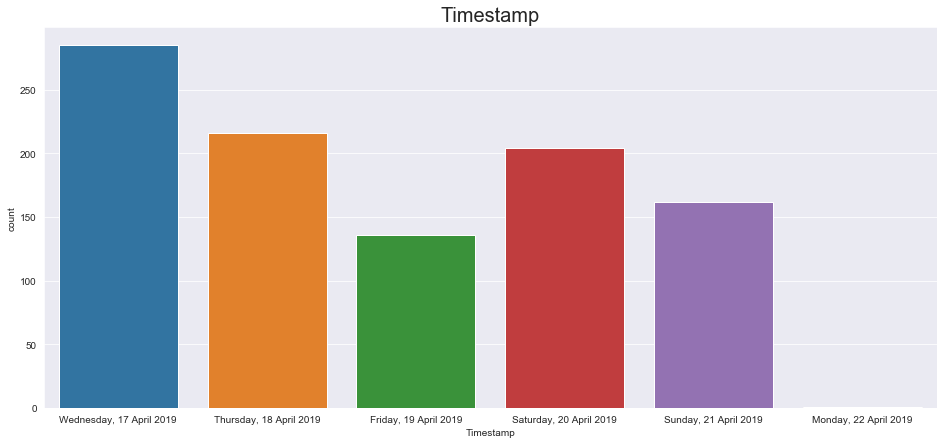

In [13]:
#Calling the function plot
plot('Timestamp')

Survey Period Plot: Describes the duration of the survey - 6 days. Wednesday, 17 April 2019, the start day, recorded 28.39% of the total survey entry and Monday, 22 April 2019, the last day, recorded the least.

### Age <a class="anchor" id="f2"></a>

In [14]:
#Calling the function func
func('Age')

Number of Unique Elements in Age: 6
Unique Elements in Age: ['35-45' '18-25' '25-35' '45-55' '55+' 'Under 18']


The Age column has 6 unique elements and the unique elements represented by age groups.

Length of DataFrame: 1004
--------------------------------------------------
Value Counts in Percentage of Unique Elements in Age:
25-35       44.02%
18-25        23.8%
35-45       18.73%
45-55        8.07%
55+          4.98%
Under 18      0.4%
Name: Age, dtype: object


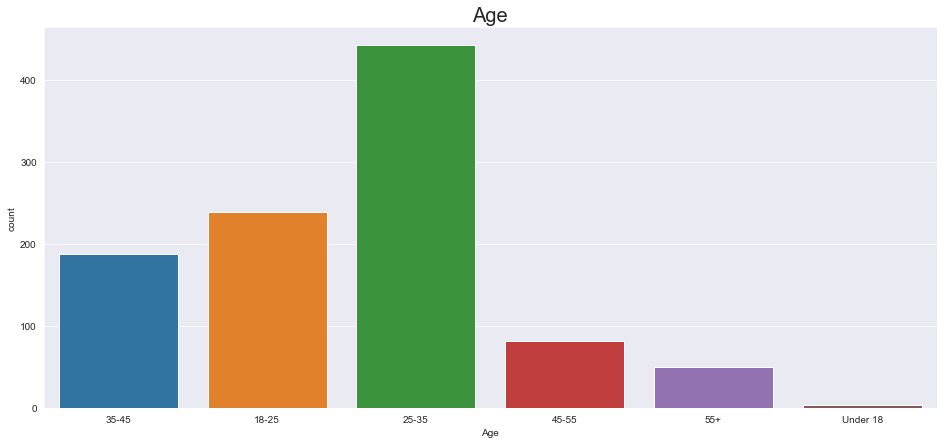

In [15]:
#Calling the function plot
plot('Age')

Age Group Plot: Majority of respondents that took part in the survey appear to be within the age of 25-35, about 44.02% of the total, while the least are those Under 18 with 0.4%. We could conclude that the survey location (if it's not an e-survey) is overshadowed by the middle age class. 

### Race <a class="anchor" id="f3"></a>

In [16]:
#Calling the function func
func('Race')

Number of Unique Elements in Race: 17
Unique Elements in Race: ['White' 'Asian/Pacific Islander' 'Black' 'Other' 'Hispanic'
 'White, Hispanic' 'American Indian/Aleut/Eskimo'
 'Black, American Indian/Aleut/Eskimo, Hispanic'
 'White, American Indian/Aleut/Eskimo' 'White, Asian/Pacific Islander'
 'White, Black' 'White, Asian/Pacific Islander, Hispanic'
 'Black, Hispanic' 'Black, Asian/Pacific Islander'
 'American Indian/Aleut/Eskimo, Hispanic'
 'Asian/Pacific Islander, Hispanic' 'Asian/Pacific Islander, Other']


The obvious unique races include: White, Asian/Pacific Islander, Black, Hispanic, American Indian/Aleut/Eskimo, and Other (describing other races not mentioned). But, somehow, we have these races mixed to form other 'races'. Let's count the number of these multiple inputs.

In [17]:
#Count entries having multiple elements in Race column
count = 0
for x in df.Race:
    if len(x.split(',')) > 1:
        count +=1
    else:
        count +=0
print (count)

41


There are 41 entries that contain more than one race and is relatively small compared to the total respondent entries, 1004. In dealing with this, we would infer that the first input assumes the race the respondent is mostly identified with.

In [18]:
#Replacing multiple race entry with the first listed element/race
df['Race'] = df.loc[:,'Race'].map(lambda x: x.replace(x,x.split(',')[0]))

In [19]:
#Calling the function func
#Confirming the unique elements
func('Race')

Number of Unique Elements in Race: 6
Unique Elements in Race: ['White' 'Asian/Pacific Islander' 'Black' 'Other' 'Hispanic'
 'American Indian/Aleut/Eskimo']


Length of DataFrame: 1004
--------------------------------------------------
Value Counts in Percentage of Unique Elements in Race:
White                           57.67%
Asian/Pacific Islander          22.71%
Black                            9.26%
Hispanic                         6.08%
American Indian/Aleut/Eskimo     2.69%
Other                            1.59%
Name: Race, dtype: object


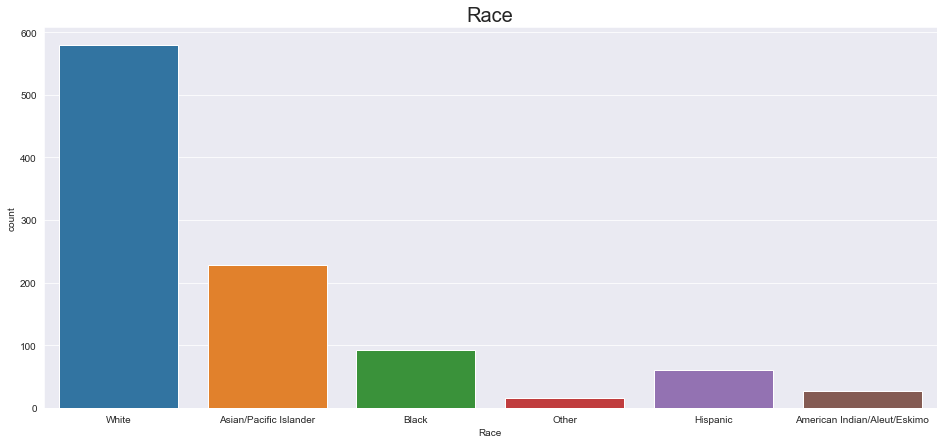

In [20]:
#Calling the function plot
plot('Race')

Race Plot: 57.67% of respondents seem to be Whites - more than any other race in the survey. If it was not an e-survey, we could easily conclude that survey location is native of the Whites.

Comparison Table: Race VS Age


Age,18-25,25-35,35-45,45-55,55+,Under 18
Race,,,,,,
American Indian/Aleut/Eskimo,1.0%,1.29%,0.2%,0.2%,0.0%,0.0%
Asian/Pacific Islander,4.28%,11.35%,4.88%,1.39%,0.7%,0.1%
Black,2.29%,4.28%,1.79%,0.4%,0.5%,0.0%
Hispanic,1.2%,3.29%,1.0%,0.3%,0.3%,0.0%
Other,0.8%,0.3%,0.2%,0.3%,0.0%,0.0%
White,14.24%,23.51%,10.66%,5.48%,3.49%,0.3%


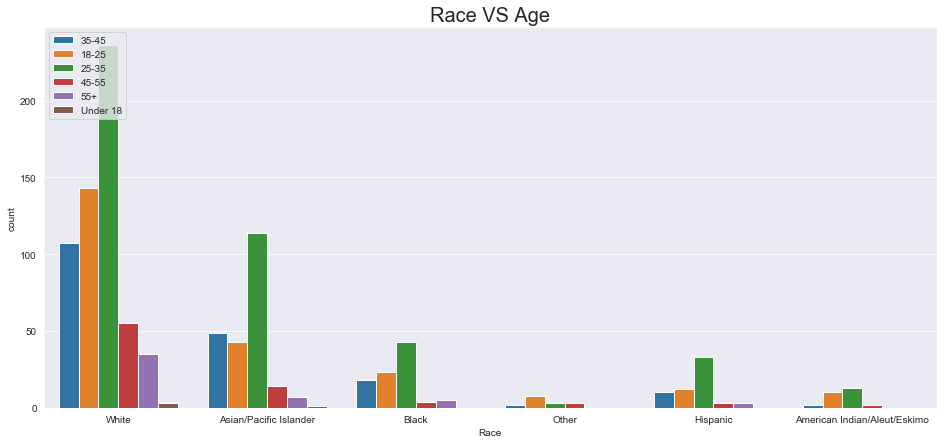

In [21]:
#Calling the function plot_hue
plot_hue('Race','Age')

Race VS Age Group Plot: 23.51% of survey respondents appear to be Whites within ages of 25-35. Only the White and Asian/Pacific Islander races recorded entry for Under 18s. Also, all races except 'Other' has 25-35 as the predominant age of respondents.

### Sex <a class="anchor" id="f4"></a>

In [22]:
#Calling the function func
func('Sex')

Number of Unique Elements in Sex: 6
Unique Elements in Sex: ['Male' 'Female' 'Prefer not to say' 'Nonbinary' 'agender' 'Genderqueer']


The Sex column has 6 unique values and they look just good.

Length of DataFrame: 1004
--------------------------------------------------
Value Counts in Percentage of Unique Elements in Sex:
Female               53.49%
Male                 45.92%
Prefer not to say      0.3%
Nonbinary              0.1%
Genderqueer            0.1%
agender                0.1%
Name: Sex, dtype: object


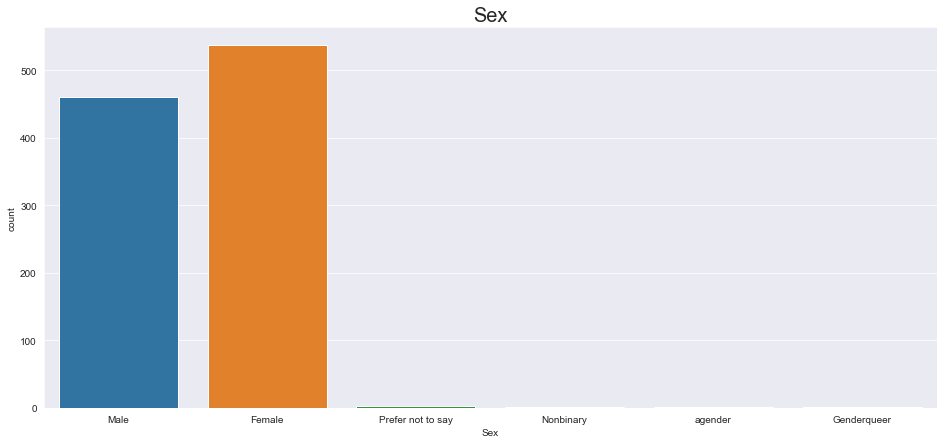

In [23]:
#Calling the function plot
plot('Sex')

Countplot of Gender: 53.49% of respondents are Females and 45.92% are Males. Nonbinary, Agender, and Genderqueer recorded the least entry.

Comparison Table: Sex VS Age


Age,18-25,25-35,35-45,45-55,55+,Under 18
Sex,,,,,,
Female,12.65%,22.61%,10.46%,4.28%,3.39%,0.1%
Genderqueer,0.0%,0.0%,0.1%,0.0%,0.0%,0.0%
Male,11.16%,21.02%,8.07%,3.78%,1.59%,0.3%
Nonbinary,0.0%,0.1%,0.0%,0.0%,0.0%,0.0%
Prefer not to say,0.0%,0.2%,0.1%,0.0%,0.0%,0.0%
agender,0.0%,0.1%,0.0%,0.0%,0.0%,0.0%


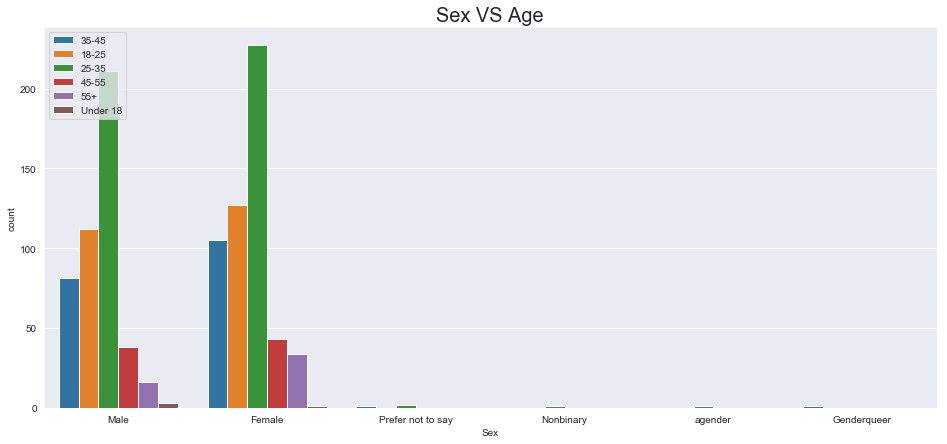

In [24]:
#Calling the function plot_hue
plot_hue('Sex','Age')

Gender VS Age Group Plot: Male and Female gender appear to be dominated by the age group 25-35 and are represented by 21.02% and 22.61% respectively of the total respondents in the survey. The other gender options recorded seemingly negligible entries.

Comparison Table: Sex VS Race


Race,American Indian/Aleut/Eskimo,Asian/Pacific Islander,Black,Hispanic,Other,White
Sex,,,,,,
Female,1.1%,10.46%,5.68%,3.29%,0.6%,32.37%
Genderqueer,0.0%,0.0%,0.0%,0.0%,0.0%,0.1%
Male,1.59%,11.95%,3.59%,2.79%,1.0%,25.0%
Nonbinary,0.0%,0.1%,0.0%,0.0%,0.0%,0.0%
Prefer not to say,0.0%,0.2%,0.0%,0.0%,0.0%,0.1%
agender,0.0%,0.0%,0.0%,0.0%,0.0%,0.1%


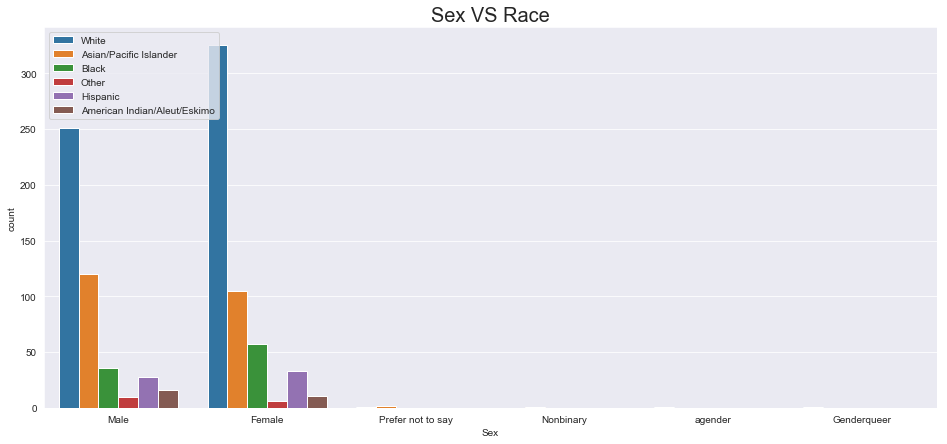

In [25]:
#Calling the function plot_hue
plot_hue('Sex','Race')

Gender VS Race Plot: 32.37% of survey respondents appear to be White-Females, 25% White-Males, and 11.95% Asian/Pacific Islander-Male.

### Own_Protection <a class="anchor" id="f5"></a>

In [26]:
#Calling the function func
func('Own_Protection')

Number of Unique Elements in Own_Protection: 20
Unique Elements in Own_Protection: ['No, I do not own any forms of protection.'
 'No, I do not own or carry any forms of protection.'
 'Yes, I own or carry a gun.'
 'Yes, I own or carry a gun., No, I do not own or carry any forms of protection.'
 'Yes, I own or carry a gun., Yes, I own or carry a knife.'
 'Yes, I own or carry a gun., Yes, I own or carry a knife., Yes, I own or carry other forms of protection.'
 'Yes, I own or carry a gun., Yes, I own or carry mace.'
 'Yes, I own or carry a gun., Yes, I own or carry mace., Yes, I own or carry a knife.'
 'Yes, I own or carry a gun., Yes, I own or carry mace., Yes, I own or carry a knife., Yes, I own or carry other forms of protection.'
 'Yes, I own or carry a gun., Yes, I own or carry other forms of protection.'
 'Yes, I own or carry a knife.'
 'Yes, I own or carry a knife., No, I do not own or carry any forms of protection.'
 'Yes, I own or carry a knife., Yes, I own or carry other forms o

Similar to the Race column, let's count the number of these multiple inputs.

In [27]:
#Count entries having multiple elements in Own_Protection column
count = 0
for x in df.Own_Protection:
    if len(x.split(',')) > 2:
        count +=1
    else:
        count +=0
print (count)

117


Likewise, we'd presume the first identified element represents the true/major entry for the respondent.

In [28]:
#Replacing multiple own protection entry with the first listed element
df['Own_Protection'] = df.loc[:,'Own_Protection'].map(lambda x: x.replace(x,x.split('.')[0]))

In [29]:
#Calling the function func
#Confirming the unique elements
func('Own_Protection')

Number of Unique Elements in Own_Protection: 6
Unique Elements in Own_Protection: ['No, I do not own any forms of protection'
 'No, I do not own or carry any forms of protection'
 'Yes, I own or carry a gun' 'Yes, I own or carry a knife'
 'Yes, I own or carry mace'
 'Yes, I own or carry other forms of protection']


In [30]:
#Count of unique elements in the Own_Protection column
df['Own_Protection'].value_counts()

No, I do not own or carry any forms of protection    541
Yes, I own or carry a gun                            141
Yes, I own or carry mace                             122
Yes, I own or carry other forms of protection        103
Yes, I own or carry a knife                           96
No, I do not own any forms of protection               1
Name: Own_Protection, dtype: int64

There are just 5 possible elements from the Own_Protection column. Although, an extra 'No, I do not own any forms of protection' stands alone. This would be added to the 'No, I do not own or carry any forms of protection' element. In addition, entries look complex and would be represented by name of protection product for ease. Below shows each element and their corresponding representation:

* None - 'No, I do not own or carry any forms of protection'
* Gun - 'Yes, I own or carry a gun'
* Mace - 'Yes, I own or carry mace'
* Knife - 'Yes, I own or carry a knife'
* Other - 'Yes, I own or carry other forms of protection'

In [31]:
#Assigning numbers to unique elements
mapping = {'No, I do not own or carry any forms of protection':'None',
           'No, I do not own any forms of protection':'None',
           'Yes, I own or carry a gun':'Gun', 
           'Yes, I own or carry mace':'Mace',
           'Yes, I own or carry a knife':'Knife',
           'Yes, I own or carry other forms of protection':'Other'}
df = df.applymap(lambda s: mapping.get(s) if s in mapping else s)

In [32]:
#Calling the function func
#Confirming assignment
func('Own_Protection')

Number of Unique Elements in Own_Protection: 5
Unique Elements in Own_Protection: ['None' 'Gun' 'Knife' 'Mace' 'Other']


Length of DataFrame: 1004
--------------------------------------------------
Value Counts in Percentage of Unique Elements in Own_Protection:
None     53.98%
Gun      14.04%
Mace     12.15%
Other    10.26%
Knife     9.56%
Name: Own_Protection, dtype: object


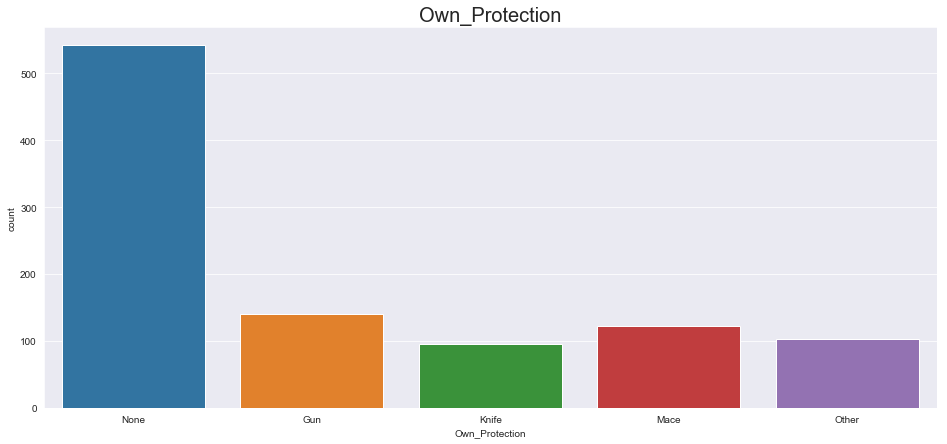

In [33]:
#Calling the function plot
plot('Own_Protection')

Own Protection Plot: About 54% of survey respondents seem not to own or carry any form of protection in the event of rape or sexual assault. The other 46% carry some form of protection, gun with 14.02% appears to be the most preferred, 12.15% prefer mace, 10.26% prefer other forms of protection, and knife with 9.56% is the least preferred.

Comparison Table: Own_Protection VS Age


Age,18-25,25-35,35-45,45-55,55+,Under 18
Own_Protection,,,,,,
Gun,4.28%,6.67%,1.79%,0.6%,0.7%,0.0%
Knife,2.59%,5.08%,1.59%,0.3%,0.0%,0.0%
Mace,4.48%,4.68%,1.49%,1.0%,0.5%,0.0%
None,10.26%,22.81%,11.85%,5.58%,3.19%,0.3%
Other,2.19%,4.78%,1.99%,0.6%,0.6%,0.1%


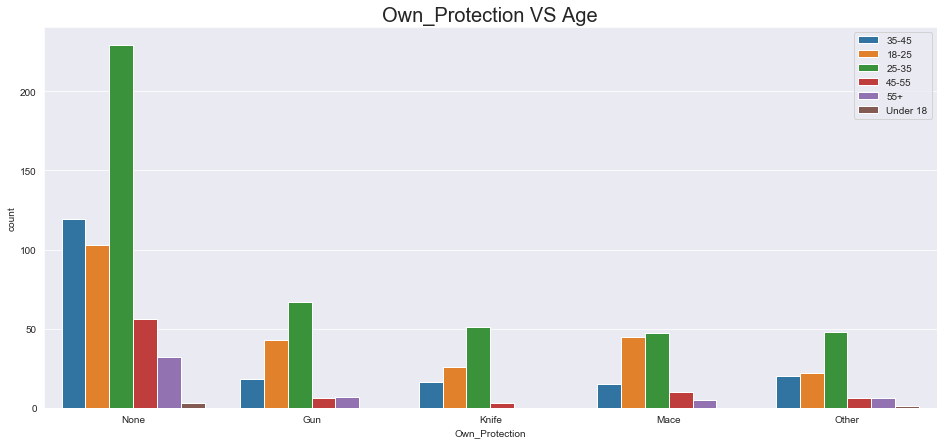

In [34]:
#Calling the function plot_hue
plot_hue('Own_Protection','Age')

Own/Carry Protection VS Age Group Plot: Majority of survey respondents from each age group appear not to own/carry protections. For respondents that own/carry protection, 6.67% of the total, fall within the 25-35 age group and prefer gun, while 4.48% of total respondents appear to fall within the 18-25 age group with mace their preferred option.

Comparison Table: Own_Protection VS Race


Race,American Indian/Aleut/Eskimo,Asian/Pacific Islander,Black,Hispanic,Other,White
Own_Protection,,,,,,
Gun,1.0%,1.99%,1.49%,0.9%,0.0%,8.67%
Knife,0.3%,2.49%,1.0%,0.7%,0.0%,5.08%
Mace,0.1%,2.09%,1.59%,0.4%,0.2%,7.77%
None,1.1%,12.65%,4.48%,3.29%,1.2%,31.27%
Other,0.2%,3.49%,0.7%,0.8%,0.2%,4.88%


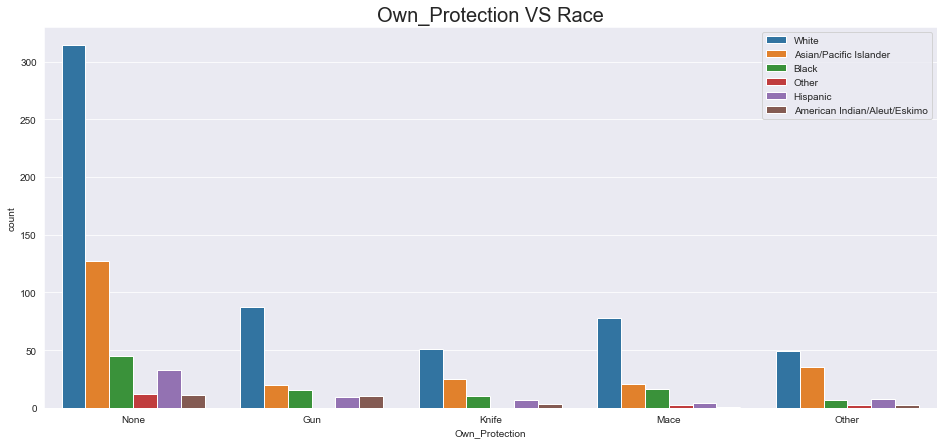

In [35]:
#Calling the function plot_hue
plot_hue('Own_Protection','Race')

Own/Carry Protection VS Race Plot: Majority of survey respondents from each race appear not to own/carry protection. For respondents that owned/carried protection, it appeared that 8.67% of the total were Whites who prefer to own/carry a gun, and 3.49%, Asians/Pacific Islanders that preferred other forms of protection.

Comparison Table: Own_Protection VS Sex


Sex,Female,Genderqueer,Male,Nonbinary,Prefer not to say,agender
Own_Protection,,,,,,
Gun,6.87%,0.0%,7.17%,0.0%,0.0%,0.0%
Knife,4.18%,0.0%,5.28%,0.0%,0.1%,0.0%
Mace,9.26%,0.0%,2.89%,0.0%,0.0%,0.0%
None,26.79%,0.0%,26.79%,0.1%,0.2%,0.1%
Other,6.37%,0.1%,3.78%,0.0%,0.0%,0.0%


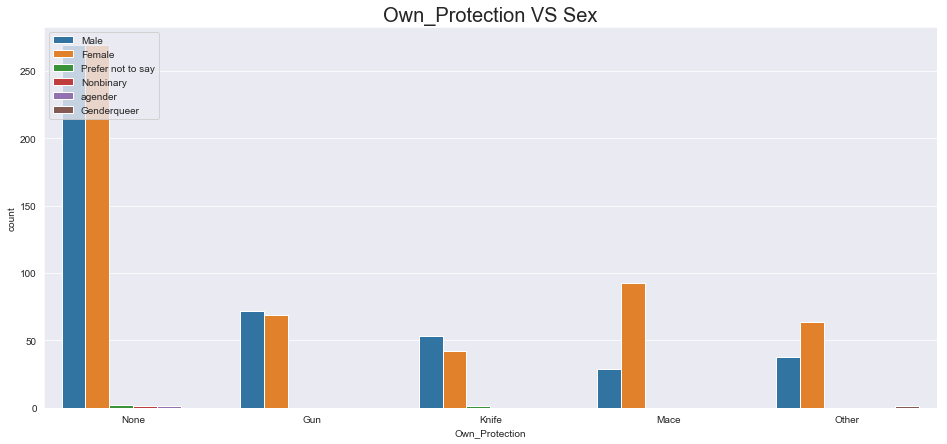

In [36]:
#Calling the function plot_hue
plot_hue('Own_Protection','Sex')

Own/Carry Protection VS Gender Plot: Slightly more respondents did not own/carry any form of protection, however, about 46% that carried, more men reported carrying a gun, while more women reported carrting a mace than other items.

### Buy_Protection <a class="anchor" id="f6"></a>

In [37]:
#Calling the function func
func('Buy_Protection')

Number of Unique Elements in Buy_Protection: 4
Unique Elements in Buy_Protection: ['No, I would not buy something to protect me against sexual assault or rape, but would buy it for someone else.'
 'Maybe, I would think about buying a product to help protect me against sexual assault.'
 'No, I would not buy a product that would help protect me against sexual assault.'
 'Yes, I would buy a product that would help protect me against sexual assault.']


We have just 4 possible elements in form of answers to the question asking a respondent if they would buy any form of protection in case of sexualt assault, attack, or other potential harm. Elements look complex and would be represented by numbers for ease. Below shows each element and their corresponding representation:

* 0 - 'No, I would not buy a product that would help protect me against sexual assault.'
* 1 - 'No, I would not buy something to protect me against sexual assault or rape, but would buy it for someone else.'
* 2 - 'Maybe, I would think about buying a product to help protect me against sexual assault.'
* 3 - 'Yes, I would buy a product that would help protect me against sexual assault.'

In [38]:
#Assigning numbers to unique elements
mapping = {'No, I would not buy a product that would help protect me against sexual assault.':0, 
           'No, I would not buy something to protect me against sexual assault or rape, but would buy it for someone else.':1, 
           'Maybe, I would think about buying a product to help protect me against sexual assault.':2,
           'Yes, I would buy a product that would help protect me against sexual assault.':3}
df = df.applymap(lambda s: mapping.get(s) if s in mapping else s)

In [39]:
#Calling the function func
#Confirming assignment
func('Buy_Protection')

Number of Unique Elements in Buy_Protection: 4
Unique Elements in Buy_Protection: [1 2 0 3]


Length of DataFrame: 1004
--------------------------------------------------
Value Counts in Percentage of Unique Elements in Buy_Protection:
3    46.31%
2    31.87%
1    14.04%
0     7.77%
Name: Buy_Protection, dtype: object


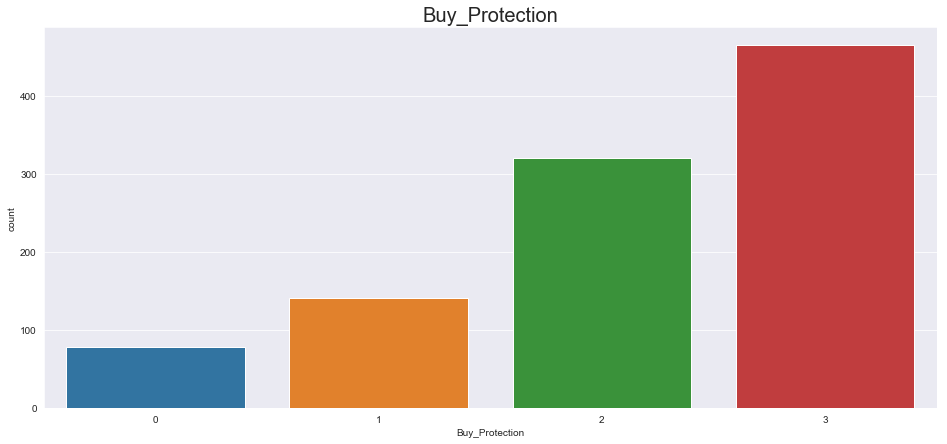

In [40]:
#Calling the function plot
plot('Buy_Protection')

Buy Protection Plot: 46.31% of survey respondents appear to admit buying a product that would help protect them against sexual assault, while 7.77% admit to not buying a product.

### Commercial DNA Testing Service <a class="anchor" id="f7"></a>

In [41]:
#Calling the function func
func('Comm_DNA')

Number of Unique Elements in Comm_DNA: 2
Unique Elements in Comm_DNA: ['No' 'Yes']


Length of DataFrame: 1004
--------------------------------------------------
Value Counts in Percentage of Unique Elements in Comm_DNA:
No     77.59%
Yes    22.41%
Name: Comm_DNA, dtype: object


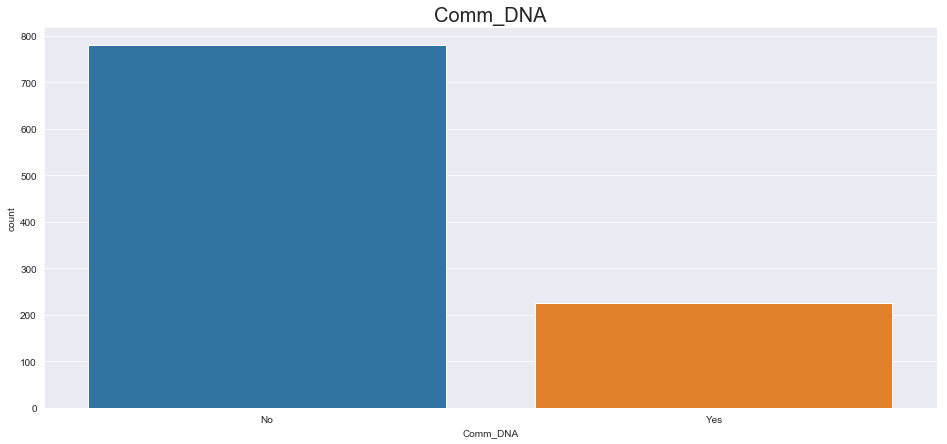

In [42]:
#Calling the function plot
plot('Comm_DNA')

Commercial DNA Testing Service Plot: About 22.4% of survey respondents seem to have used some form of commercial DNA testing services.  

### Victim <a class="anchor" id="f8"></a>

In [43]:
#Calling the function func
func('Victim')

Number of Unique Elements in Victim: 3
Unique Elements in Victim: ['No' 'Yes' 'Maybe']


Length of DataFrame: 1004
--------------------------------------------------
Value Counts in Percentage of Unique Elements in Victim:
No       67.43%
Yes       25.8%
Maybe     6.77%
Name: Victim, dtype: object


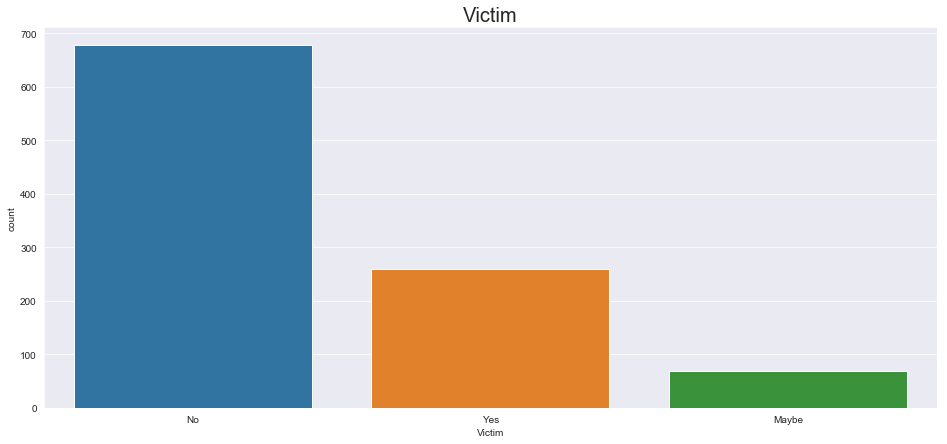

In [44]:
#Calling the function plot
plot('Victim')

Victim Plot: 67.43% of survey respondents seem to have never been victim of rape or sexual assault. Only about 25.8% seem to admit to have been victims, while 6.77% were indecisive.

Comparison Table: Victim VS Age


Age,18-25,25-35,35-45,45-55,55+,Under 18
Victim,,,,,,
Maybe,1.29%,3.09%,1.29%,0.8%,0.2%,0.1%
No,15.84%,29.78%,12.55%,5.38%,3.59%,0.3%
Yes,6.67%,11.16%,4.88%,1.89%,1.2%,0.0%


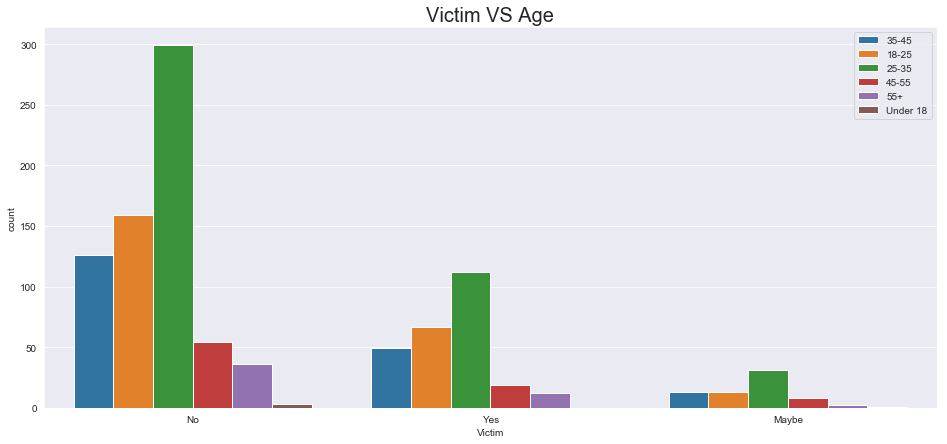

In [45]:
#Calling the function plot_hue
plot_hue('Victim','Age')

Victim VS Age Group Plot: 11.16% of survey respondents seem to be within the ages of 25-35 and appear to have been rape/sexual assault victims. None of the respondents Under 18 seem to have been a victim.

### Witness <a class="anchor" id="f9"></a>

In [46]:
#Calling the function func
func('Witness')

Number of Unique Elements in Witness: 2
Unique Elements in Witness: [nan 'No' 'Yes']


There are null value(s) under this column. Lets see them.

In [47]:
df[df['Witness'].isnull()].transpose()

,0
Timestamp,"Wednesday, 17 April 2019"
Age,35-45
Race,White
Sex,Male
Own_Protection,None
Buy_Protection,1
Comm_DNA,No
Victim,No
Witness,NaN
File_Report,NaN


Just one respondent failed to fill this column. Apparently, we could assume the mode value of Witness column for this respondent, but, likewise, other columns with no inputs would have to be assumed. Alternatively, since it's just one entry, we could do away with it.

In [48]:
#Dropping the row with insufficient information
df.drop(0,axis=0,inplace=True)

Length of DataFrame: 1003
--------------------------------------------------
Value Counts in Percentage of Unique Elements in Witness:
No     82.75%
Yes    17.25%
Name: Witness, dtype: object


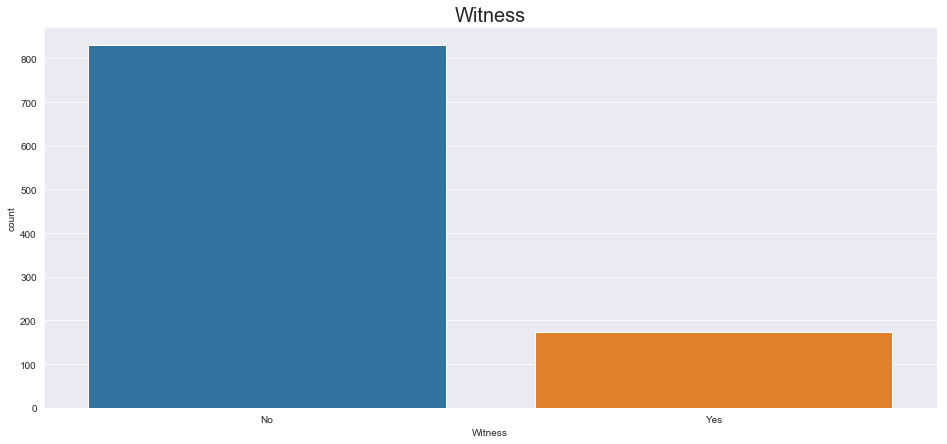

In [49]:
#Calling the function plot
plot('Witness')

Witness Plot: 82.75% of survey respondents seem to have never been a witness to rape or sexual assault. Only about 17.25% appear to admit to have been witnesses.

### Comfort <a class="anchor" id="f10"></a>

In [50]:
#Calling the function func
func('Comfort')

Number of Unique Elements in Comfort: 10
Unique Elements in Comfort: [ 8.  9.  5.  7.  3. 10.  1.  6.  4.  2.]


The Comfort column tells how comfortable a respondent feels about going to the authorities (police or hospitals) for any case. It is represented by its unique elements as shown above - numbers 1 to 10, where 1 represents 'Very Uncomfortable' and 10 'Very Comfortable'.

Length of DataFrame: 1003
--------------------------------------------------
Value Counts in Percentage of Unique Elements in Comfort:
10.0    17.55%
8.0     16.25%
7.0     13.56%
6.0     10.07%
9.0      9.87%
1.0      7.98%
5.0      7.78%
3.0      6.38%
4.0      5.68%
2.0      4.89%
Name: Comfort, dtype: object


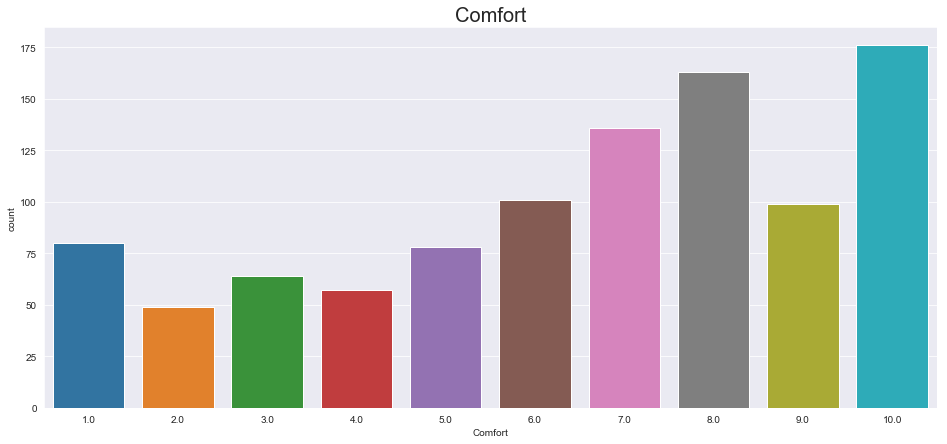

In [51]:
#Calling the function plot
plot('Comfort')

Comfort Plot: 17.55% of survey population seem to be completely comfortable with reporting to the authorities. At the other end, about 7.98% appear to be very uncomfortable.

# Part 2: Victims and/or Witnesses Analysis <a class="anchor" id="second-bullet"></a>

This section of analysis would major on respondents that seem to have been victims and/or witnesses of sexual assault. Here, insights on race, age group, sex that have majorly been involved would be revealed.

### Preliminary <a class="anchor" id="s0"></a>

One major column that would be involved in the analysis of victim and witness respondents is the File_Report column. This column tells if a victim and/or witness filed a report at either a police station or a hospital after the event of rape or sexual assault or not. So, if a victim/witness filed a report, he/she would state the authority involved, police and/or hospital. Also, if no report was made, 'None' should be filled in this column. Thus, either way, if a respondent has been a victim/witness to rape/sexual assault, it is expected that the File_Report column be filled by the respondent. 

Let's start by getting more information about this column.

In [52]:
#Function to output number of unique elements and unique elements in a column
func('File_Report')

Number of Unique Elements in File_Report: 4
Unique Elements in File_Report: [nan
 'No, I  nor the victim did not go to the hospital or file a police report.'
 'Yes, I or the victim went to the police and filled a police report.'
 'Yes, I or the victim went to the hospital and received a sexual assault evidence kit.'
 'Yes, I or the victim went to the hospital and received a sexual assault evidence kit AND filled a police report.']


Four elements! Each would be replaced for ease.  We'd also notice the occurrence of null values under this column. But, this column is a function of other columns, that is, only respondent who have been victims or witnesses are expected to fill this column. So, null values should be expected for respondents who haven't been victims or witnesses to rape/sexual assault. Below shows each element and their corresponding representation. 

* None - 'No, I  nor the victim did not go to the hospital or file a police report.'
* Police - 'Yes, I or the victim went to the police and filled a police report.'
* Hospital - 'Yes, I or the victim went to the hospital and received a sexual assault evidence kit.'
* Hospital and Police - 'Yes, I or the victim went to the hospital and received a sexual assault evidence kit AND filled a police report.'

In [53]:
#Assigning new names to unique elements
mapping = {'No, I  nor the victim did not go to the hospital or file a police report.':'None', 
           'Yes, I or the victim went to the police and filled a police report.':'Police', 
           'Yes, I or the victim went to the hospital and received a sexual assault evidence kit.':'Hospital',
           'Yes, I or the victim went to the hospital and received a sexual assault evidence kit AND filled a police report.':'Hospital and Police'}
df = df.applymap(lambda s: mapping.get(s) if s in mapping else s)

Now we can confirm the elements of the File_Report column.

In [54]:
func('File_Report')

Number of Unique Elements in File_Report: 4
Unique Elements in File_Report: [nan 'None' 'Police' 'Hospital' 'Hospital and Police']


Let's create a dataframe for respondents that are eligible to fill this column.

In [55]:
#Creating a dataframe containing Victims or Witnesses of Rape or Sexual assaults.
vic_wit = df[(df['Victim'] == 'Yes') | (df['Victim'] == 'Maybe') | 
(df['Witness'] == 'Yes')]

In [56]:
#Count of repondents who have/may have been victims or witnesses of rape or sexual assaults.
len(vic_wit)

383

In [57]:
#Count of true null values in the File_Report column
vic_wit['File_Report'].isnull().sum()

32

It implies there are 32 respondents that may have been victims/witnesses to rape/sexual assault, but, they failed to fill the File_Report column. Let's take a look at these respondents.

In [58]:
vic_wit[vic_wit['File_Report'].isnull()]

,Timestamp,Age,Race,Sex,Own_Protection,Buy_Protection,Comm_DNA,Victim,Witness,File_Report,No_File_Report,Comfort
24,"Wednesday, 17 April 2019",18-25,Hispanic,Female,None,2,No,Maybe,Yes,NaN,I did not know at the time what was considered...,8.0
47,"Thursday, 18 April 2019",18-25,Other,Male,None,2,No,Yes,No,NaN,Discrimination,1.0
62,"Wednesday, 17 April 2019",25-35,Asian/Pacific Islander,Male,None,3,Yes,Maybe,No,NaN,NaN,5.0
139,"Thursday, 18 April 2019",25-35,White,Male,None,1,No,No,Yes,NaN,NaN,6.0
144,"Thursday, 18 April 2019",25-35,Black,Female,None,3,No,Yes,No,NaN,Scared,10.0
209,"Wednesday, 17 April 2019",35-45,Asian/Pacific Islander,Female,None,1,No,Yes,No,NaN,NaN,6.0
211,"Wednesday, 17 April 2019",35-45,Asian/Pacific Islander,Female,None,3,No,Maybe,No,NaN,NaN,1.0
231,"Wednesday, 17 April 2019",35-45,White,Female,None,3,No,Maybe,No,NaN,no scared,1.0
266,"Thursday, 18 April 2019",35-45,Black,Male,None,0,No,No,Yes,NaN,NaN,4.0
302,"Thursday, 18 April 2019",45-55,White,Female,None,2,No,Yes,No,NaN,NaN,9.0


In dealing with this missing values, we'd take a peek into the No_File_Report column. We can observe that some of these respondents have entries in the No_File_Report column. Thus, we'd assume that those that have entry in the No_File_Report column (a column stating reasons why a respondent didn't file a report), should have 'None' as the entry into the File_Report column, that is, implying that respondent didn't file a report having been a victim/witness to sexual assault.

In [59]:
#Setting 'None' in the File_Report column for respondent with entries in the No_File Report column
x = vic_wit[vic_wit['No_File_Report'].notnull()]
y=x[x['File_Report'].isnull()]
for i in y.index:
    df['File_Report'].at[i] = 'None'
    vic_wit['File_Report'].at[i] = 'None'

In [60]:
#An overview of the remaining entries with null value under the File_Report column
vic_wit[vic_wit['File_Report'].isnull()]

,Timestamp,Age,Race,Sex,Own_Protection,Buy_Protection,Comm_DNA,Victim,Witness,File_Report,No_File_Report,Comfort
62,"Wednesday, 17 April 2019",25-35,Asian/Pacific Islander,Male,None,3,Yes,Maybe,No,NaN,NaN,5.0
139,"Thursday, 18 April 2019",25-35,White,Male,None,1,No,No,Yes,NaN,NaN,6.0
209,"Wednesday, 17 April 2019",35-45,Asian/Pacific Islander,Female,None,1,No,Yes,No,NaN,NaN,6.0
211,"Wednesday, 17 April 2019",35-45,Asian/Pacific Islander,Female,None,3,No,Maybe,No,NaN,NaN,1.0
266,"Thursday, 18 April 2019",35-45,Black,Male,None,0,No,No,Yes,NaN,NaN,4.0
302,"Thursday, 18 April 2019",45-55,White,Female,None,2,No,Yes,No,NaN,NaN,9.0
324,"Friday, 19 April 2019",55+,White,Female,None,2,Yes,Yes,No,NaN,NaN,8.0
468,"Sunday, 21 April 2019",18-25,White,Female,None,2,No,Yes,No,NaN,NaN,4.0
640,"Saturday, 20 April 2019",35-45,White,Male,Gun,2,Yes,Yes,No,NaN,NaN,1.0
657,"Wednesday, 17 April 2019",25-35,American Indian/Aleut/Eskimo,Male,Gun,3,Yes,Maybe,No,NaN,NaN,6.0


In [61]:
#Count of the remaining entries with null value under the File_Report column
len(vic_wit[vic_wit['File_Report'].isnull()])

21

As for the remaining 21 entries that neither stated if they filed a report or not, nor stated reason why they didn't file a report, they would have to be excluded as no major deduction/assumption can be made on them.

In [62]:
#Excluding respondents with no entries in both the File_Report column and No_File_Report column.
a = vic_wit[vic_wit['File_Report'].isnull()]
for i in a.index:
    df.drop(i,axis=0,inplace=True)
    vic_wit.drop(i,axis=0,inplace=True)

In [63]:
#Count of respondents who have/may have been victims of rape or sexual assault
len(vic_wit[(vic_wit['Victim'] == 'Yes') | (vic_wit['Victim'] == 'Maybe')])

311

In [64]:
#Count of respondents who have been witnesses of rape or sexual assault
len(vic_wit[vic_wit['Witness'] == 'Yes'])

166

It should be noted that there is a possibility of respondents who seem to be victims of rape also being witnesses to rape. Let's count the number of these respondents.

In [65]:
#Count of respondents that appear to have been both victim and witness to rape
len(vic_wit[((vic_wit['Victim'] == 'Yes') | (vic_wit['Victim'] == 'Maybe')) & 
            (vic_wit['Witness'] == 'Yes')])

115

Let's create two dataframes containing these respondents - victims and witnesses. 

In [66]:
#Creating a dataframe for just respondents that appear ot have been victims
vic = vic_wit[(vic_wit['Victim'] == 'Yes') | (vic_wit['Victim'] == 'Maybe')]

In [67]:
#Creating a dataframe for just respondents that appear ot have been witnesses
wit = vic_wit[vic_wit['Witness'] == 'Yes']

We now have two new sub-dataframes: 'vic' containing just respondents who appear to have been victims and 'wit' containing just respondents who appear to have been witnesses. Let's explore this sub-dataframes to get insights about these respondents. We'd start by defining necessary functions. 

In [68]:
rcParams['figure.figsize'] = (16,7)
#Function to output countplot of columns for both Victims and Witnesses
def vicwit_plot(col):
    fig, ax = plt.subplots(nrows=1,ncols=2)
    col in vic_wit.columns
    len_vic = len(vic)
    vic_count = vic[col].value_counts(normalize=True).apply(lambda x:str(round((x*100),2))+'%')
    plot = sns.countplot(vic[col],ax=ax[0])
    ax[0].set_title("Victims' {}".format(col),fontsize=20)
    matplotlib.pyplot.sca(ax[0])
    plt.xticks(rotation=45)
    print('Length of Victim DataFrame: {}'.format(len_vic))
    print(50*'-')
    print("Value Counts(%) of Victims' {}:\n{}".format(col,vic_count))
    
    len_wit = len(wit)
    wit_count = wit[col].value_counts(normalize=True).apply(lambda x:str(round((x*100),2))+'%')
    plot = sns.countplot(wit[col],ax=ax[1])
    ax[1].set_title("Witness' {}".format(col),fontsize=20)
    matplotlib.pyplot.sca(ax[1])
    plt.xticks(rotation=45)
    print('\n')
    print('Length of Witness DataFrame: {}'.format(len_wit))
    print(50*'-')
    print("Value Counts(%) of Witness' {}:\n{}".format(col,wit_count))
    return plot

In [69]:
#Function to output countplot of columns in comparison with another column (hue) for both VIctims and Witnesses
def vicwit_plot_hue(col,hue):
    fig, ax = plt.subplots(nrows=1,ncols=2)
    cross_tab=pd.crosstab(vic[col],vic[hue],normalize=True).apply(lambda x:round((x*100),2).astype(str)+'%')
    cross_df_vic = pd.DataFrame(data=cross_tab.values,index=cross_tab.index,columns=cross_tab.columns)
    plot_vic = sns.countplot(x=vic[col],hue=vic[hue],ax=ax[0])
    ax[0].set_title("Victims' {} VS Victims' {}".format(col,hue), fontsize = 20)
    matplotlib.pyplot.sca(ax[0])
    plt.xticks(rotation=45)
    ax[0].legend(loc=1)    
    
    cross_tab_wit=pd.crosstab(wit[col],wit[hue],normalize=True).apply(lambda x:round((x*100),2).astype(str)+'%')
    cross_df_wit = pd.DataFrame(data=cross_tab_wit.values,index=cross_tab_wit.index,columns=cross_tab_wit.columns)
    plot_wit = sns.countplot(x=wit[col],hue=wit[hue],ax=ax[1])
    ax[1].set_title("Witness' {} VS Witness' {}".format(col,hue), fontsize = 20)
    matplotlib.pyplot.sca(ax[1])
    plt.xticks(rotation=45)
    ax[1].legend(loc=1)
    
    print("Comparison Table: Victims' {} VS Victims' {}".format(col,hue))
    print(cross_df_vic)
    print('\n')
    print("Comparison Table: Witness' {} VS Witness' {}".format(col,hue))
    print(cross_df_wit)

With our new dataframes, analysis would be run on columns to gain more insight.

### Age <a class="anchor" id="s1"></a>

Length of Victim DataFrame: 311
--------------------------------------------------
Value Counts(%) of Victims' Age:
25-35       43.73%
18-25       24.76%
35-45       18.97%
45-55        8.36%
55+          3.86%
Under 18     0.32%
Name: Age, dtype: object


Length of Witness DataFrame: 166
--------------------------------------------------
Value Counts(%) of Witness' Age:
25-35     50.6%
18-25    31.33%
35-45    12.05%
45-55     4.22%
55+       1.81%
Name: Age, dtype: object


<Figure size 1152x504 with 0 Axes>

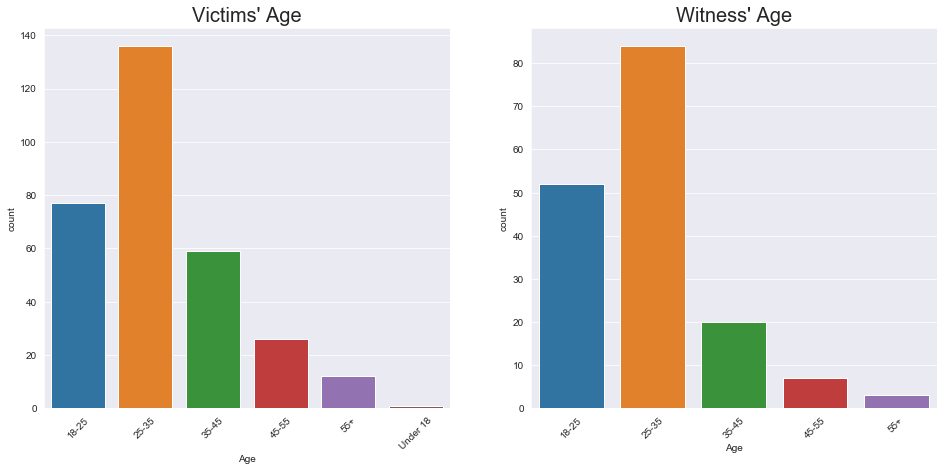

In [70]:
#Countplot of Age
fig = plt.figure()
vicwit_plot('Age')
fig.savefig('Age2')

Age Plot: Categories of respondents that appear to be victims and witnesses are both dominated by the 25-35 age group. 43.73% of Victims seem to fall within this age group, while about half of witnesses (50.6%) seem to fall within this age group. Noticeably, no record of an Under 18 being a witness.

### Race <a class="anchor" id="s2"></a>

Length of Victim DataFrame: 311
--------------------------------------------------
Value Counts(%) of Victims' Race:
White                           60.45%
Asian/Pacific Islander          18.97%
Black                            8.04%
Hispanic                         6.75%
American Indian/Aleut/Eskimo     3.86%
Other                            1.93%
Name: Race, dtype: object


Length of Witness DataFrame: 166
--------------------------------------------------
Value Counts(%) of Witness' Race:
White                           46.99%
Asian/Pacific Islander          30.12%
Black                           12.05%
Hispanic                         4.82%
American Indian/Aleut/Eskimo     4.82%
Other                             1.2%
Name: Race, dtype: object


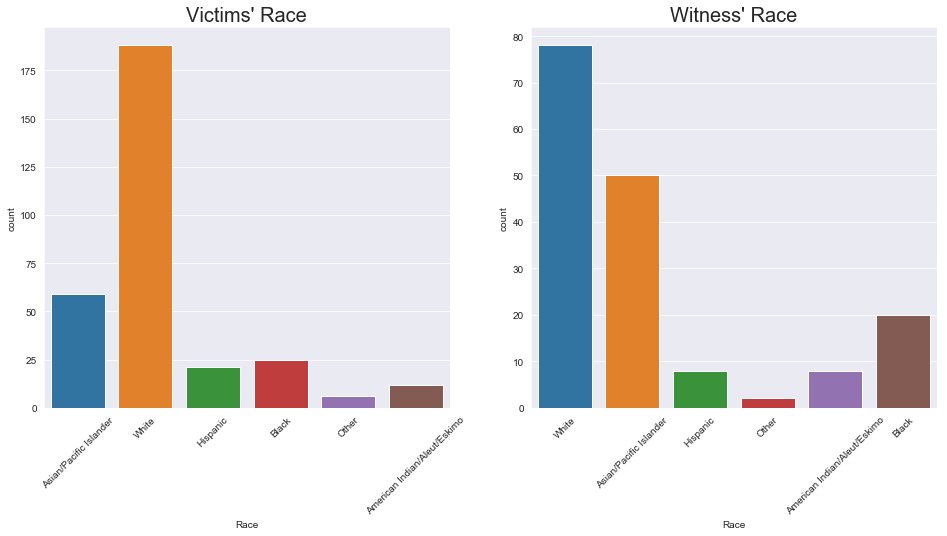

In [71]:
#Countplot of Race
vicwit_plot('Race')

Race Plot: 60.45% and 46.99% represents percentage of victim and witness respondents resectively that appear to be Whites. This further supports out earlier inference that location of survey is home to the Whites.

### Sex <a class="anchor" id="s3"></a>

Length of Victim DataFrame: 311
--------------------------------------------------
Value Counts(%) of Victims' Sex:
Female          70.1%
Male           29.26%
agender         0.32%
Genderqueer     0.32%
Name: Sex, dtype: object


Length of Witness DataFrame: 166
--------------------------------------------------
Value Counts(%) of Witness' Sex:
Male      52.41%
Female    47.59%
Name: Sex, dtype: object


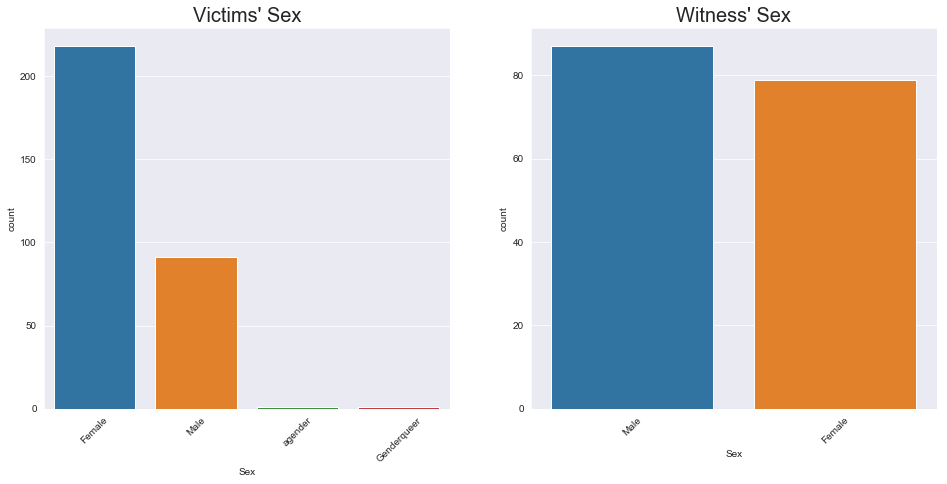

In [72]:
#Countplot of sex
vicwit_plot('Sex')

Sex Plot: It appears like about 70% of victims seem to be females. This obviously reports the female gender to be the major target of rape in that location. About 52% and 48% represents the percentage of males and females respectively that appear to be witnesses.

Comparison Table: Victims' Sex VS Victims' Age
Age           18-25   25-35   35-45  45-55    55+ Under 18
Sex                                                       
Female       15.43%  28.62%  15.43%  6.75%  3.54%    0.32%
Genderqueer    0.0%    0.0%   0.32%   0.0%   0.0%     0.0%
Male          9.32%  14.79%   3.22%  1.61%  0.32%     0.0%
agender        0.0%   0.32%    0.0%   0.0%   0.0%     0.0%


Comparison Table: Witness' Sex VS Witness' Age
Age      18-25   25-35  35-45  45-55    55+
Sex                                        
Female  14.46%  23.49%  6.02%  1.81%  1.81%
Male    16.87%  27.11%  6.02%  2.41%   0.0%


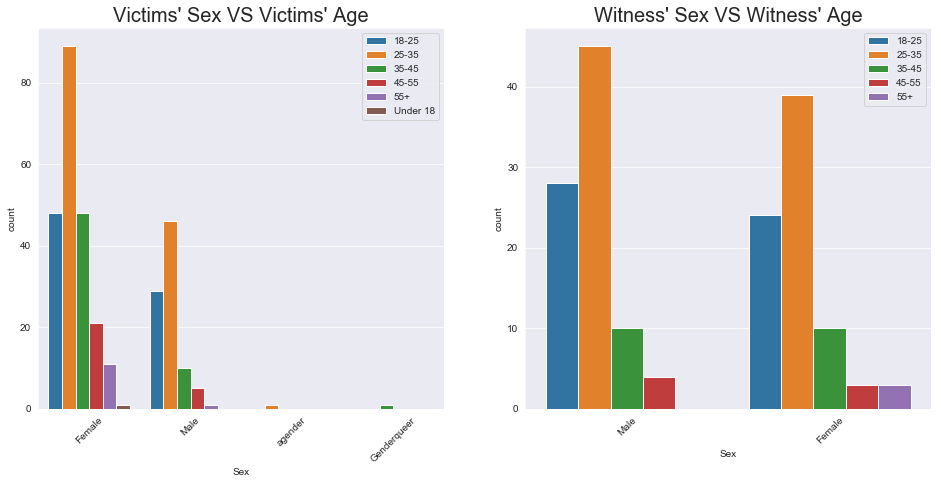

In [73]:
vicwit_plot_hue('Sex','Age')

Sex VS Age Plot: Both the female and male gender that appear to have been victims and witnesses seem to be majorly within the ages of 25-35. 

### Own Protection <a class="anchor" id="s4"></a>

Length of Victim DataFrame: 311
--------------------------------------------------
Value Counts(%) of Victims' Own_Protection:
None     39.87%
Gun      20.26%
Mace     18.33%
Other    10.93%
Knife    10.61%
Name: Own_Protection, dtype: object


Length of Witness DataFrame: 166
--------------------------------------------------
Value Counts(%) of Witness' Own_Protection:
Gun      31.33%
Mace      24.1%
None     18.67%
Other    14.46%
Knife    11.45%
Name: Own_Protection, dtype: object


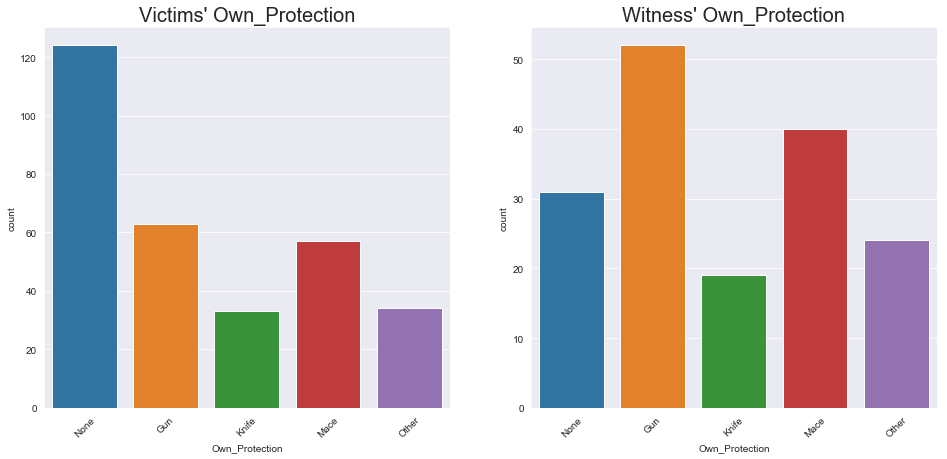

In [74]:
#Countplot of Own_Protection
vicwit_plot('Own_Protection')

Own Protection Plot: About 40% of victims seem not to own/carry any form of protection. 20.26% represents victims that owned a gun - the most among those who owned/carried protection. On the other hand, 31.33% of witnesses own/carry gun - the most in that category. Except location of survey lagalised the ownership of guns, we could infer that majority of witnesses are the police. Already we discovered that majority of reports filed by those who owned guns were done at the station.

### Buy Protection <a class="anchor" id="s5"></a>

Length of Victim DataFrame: 311
--------------------------------------------------
Value Counts(%) of Victims' Buy_Protection:
3    58.84%
2    31.51%
0     6.43%
1     3.22%
Name: Buy_Protection, dtype: object


Length of Witness DataFrame: 166
--------------------------------------------------
Value Counts(%) of Witness' Buy_Protection:
3    63.25%
2    22.89%
0     8.43%
1     5.42%
Name: Buy_Protection, dtype: object


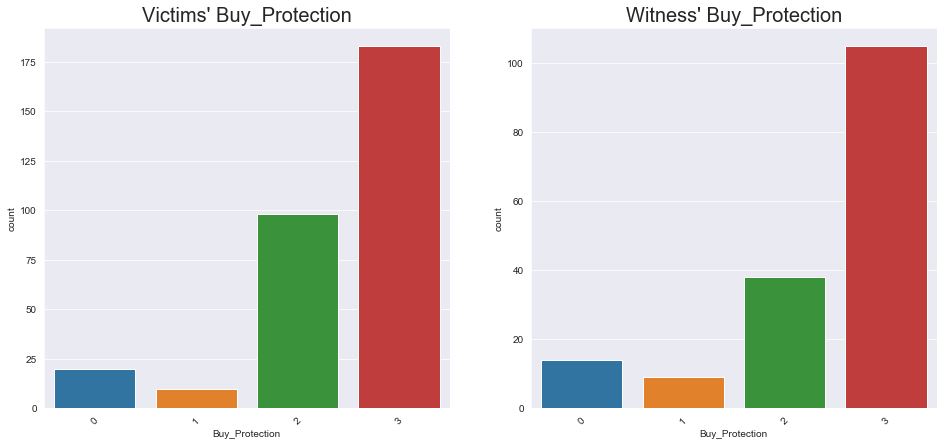

In [75]:
#Countplot of Buy_Protection
vicwit_plot('Buy_Protection')

Buy Protection Plot: 58.84% and 63.25% represents the percentages of victims and witnesses respectively that seem to admit buying a protection product that would help protect them against sexual assault.

### Commercial DNA Testing Service <a class="anchor" id="s6"></a>

Length of Victim DataFrame: 311
--------------------------------------------------
Value Counts(%) of Victims' Comm_DNA:
No     63.34%
Yes    36.66%
Name: Comm_DNA, dtype: object


Length of Witness DataFrame: 166
--------------------------------------------------
Value Counts(%) of Witness' Comm_DNA:
Yes    54.82%
No     45.18%
Name: Comm_DNA, dtype: object


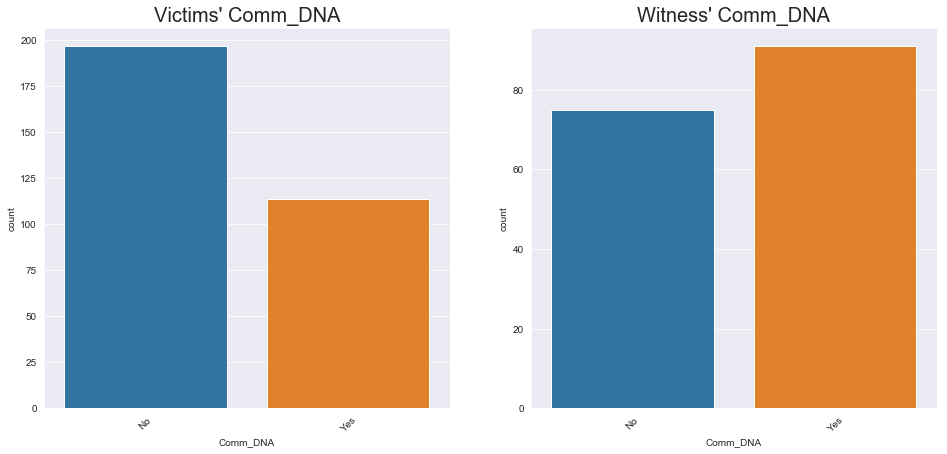

In [76]:
#Countplot of commercial DNA testing service
vicwit_plot('Comm_DNA')

Commercial DNA Testing Service Plot: 36.66% and 54.82% represent percentages of victims and witnesses respectively that have used some commercial DNA testing service.

### Comfort <a class="anchor" id="s7"></a>

Length of Victim DataFrame: 311
--------------------------------------------------
Value Counts(%) of Victims' Comfort:
1.0     17.04%
10.0    11.58%
7.0     10.93%
8.0     10.93%
3.0     10.29%
2.0     10.29%
5.0      8.04%
6.0      8.04%
9.0      7.72%
4.0      5.14%
Name: Comfort, dtype: object


Length of Witness DataFrame: 166
--------------------------------------------------
Value Counts(%) of Witness' Comfort:
8.0     18.67%
10.0    15.66%
7.0     14.46%
9.0     13.25%
1.0      9.04%
6.0      8.43%
3.0      6.63%
5.0      4.82%
2.0      4.82%
4.0      4.22%
Name: Comfort, dtype: object


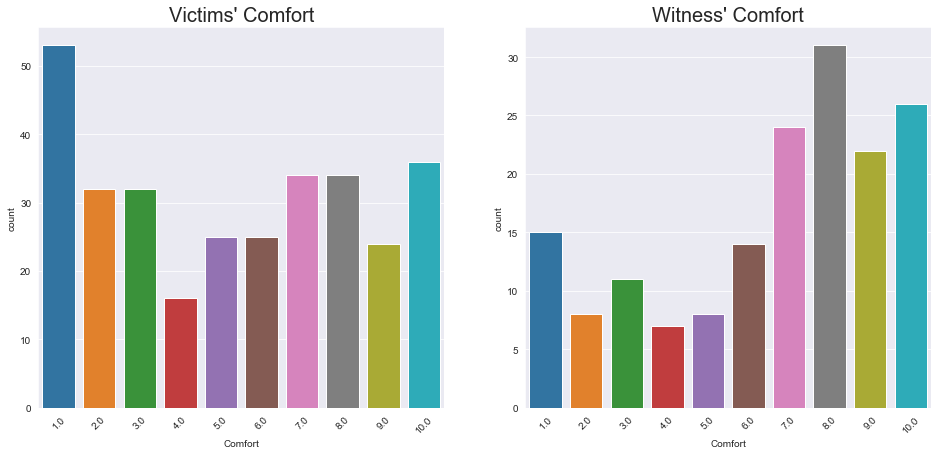

In [77]:
#Countplot of Comfort
vicwit_plot('Comfort')

Comfort Plot: It appears like a relatively large percentage of victims - 17.04% - feel very uncomfortable reporting to the authorities. This could be ascribed to the possible unfair treatment gotten when sexual assault cases were reported to the authorities. About 11% of victims appear to be very comfortable with the authorities. For witnesses, about 9% and 16% feel very uncomfortable and very comfortable respectively with the authorities. Generally, Witnesses appear more comfortable with authorities than victims.

### File Report <a class="anchor" id="s8"></a>

Length of Victim DataFrame: 311
--------------------------------------------------
Value Counts(%) of Victims' File_Report:
None                   61.09%
Police                 23.47%
Hospital                9.97%
Hospital and Police     5.47%
Name: File_Report, dtype: object


Length of Witness DataFrame: 166
--------------------------------------------------
Value Counts(%) of Witness' File_Report:
Police                 44.58%
None                   28.31%
Hospital               19.88%
Hospital and Police     7.23%
Name: File_Report, dtype: object


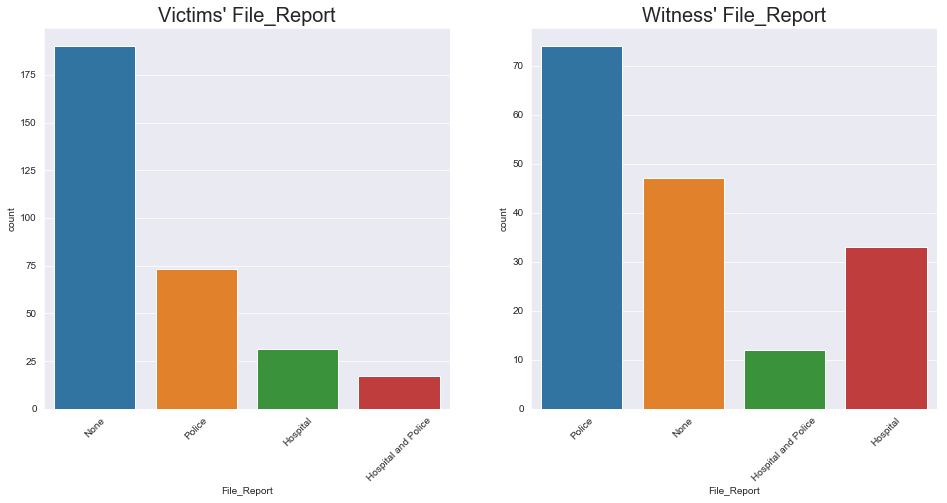

In [78]:
#Countplot of the File_Report column
vicwit_plot('File_Report')

File Report plot: 61.09% and 28.31% of victims and witnesses respectively, appear not to have reported to a hospital or police station to file a report. 23.47% and 44.58% of victims and witnesses respectively, appear to have filed a report at the police station, 9.97% and 19.88% respectively, visited the hospital and received a sexual assault kit.

Comparison Table: Victims' File_Report VS Victims' Age
Age                   18-25   25-35   35-45  45-55    55+ Under 18
File_Report                                                       
Hospital              2.89%   5.79%   1.29%   0.0%   0.0%     0.0%
Hospital and Police   1.29%   1.93%   1.61%  0.32%  0.32%     0.0%
None                 12.22%   25.4%  14.47%  6.43%  2.25%    0.32%
Police                8.36%  10.61%   1.61%  1.61%  1.29%     0.0%


Comparison Table: Witness' File_Report VS Witness' Age
Age                   18-25   25-35  35-45  45-55   55+
File_Report                                            
Hospital              7.83%   9.64%  1.81%   0.6%  0.0%
Hospital and Police   1.81%   3.61%   1.2%   0.0%  0.6%
None                  4.82%  16.27%  5.42%  1.81%  0.0%
Police               16.87%  21.08%  3.61%  1.81%  1.2%


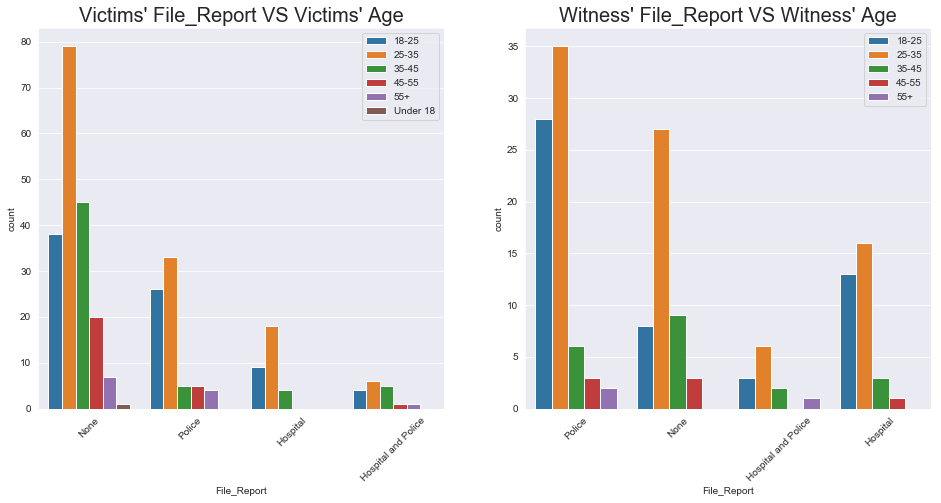

In [79]:
vicwit_plot_hue('File_Report','Age')

File Report VS Age Plot: 25.4% and 16.27% represents percentage of victims and witnesses respectively that are within the ages 25-35 but failed to report at either a police station or hospital. Another noticeable high percentage is the case of age group 35-45. Compared to other options, a percentage of 14.47% shows that a large number of victims within this age group, seem not to have reported to either a police station or a hospital.

Comparison Table: Victims' File_Report VS Victims' Race
Race                American Indian/Aleut/Eskimo Asian/Pacific Islander  \
File_Report                                                               
Hospital                                   0.32%                  3.86%   
Hospital and Police                        0.96%                  0.96%   
None                                       0.64%                  6.43%   
Police                                     1.93%                  7.72%   

Race                 Black Hispanic  Other   White  
File_Report                                         
Hospital             0.64%    0.32%   0.0%   4.82%  
Hospital and Police  0.32%    0.32%   0.0%   2.89%  
None                 4.82%    5.47%  1.29%  42.44%  
Police               2.25%    0.64%  0.64%  10.29%  


Comparison Table: Witness' File_Report VS Witness' Race
Race                American Indian/Aleut/Eskimo Asian/Pacific Islander  \
File_Report                               

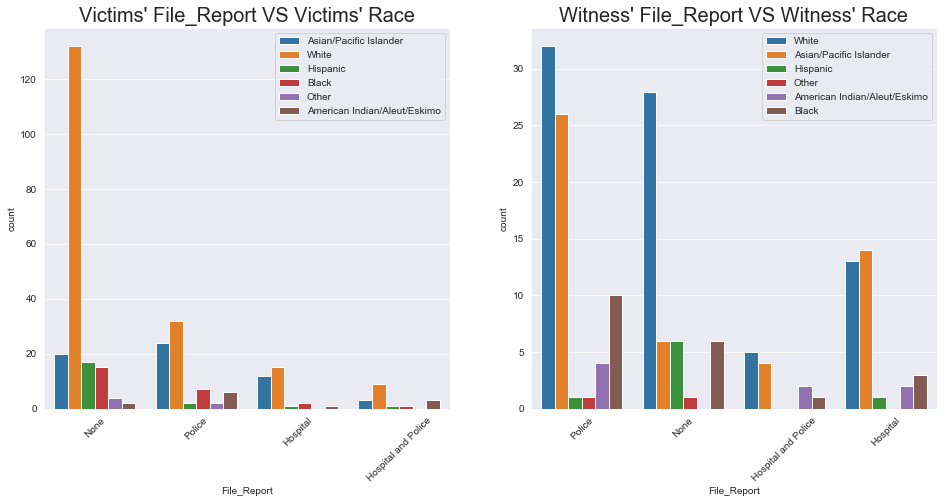

In [80]:
vicwit_plot_hue('File_Report','Race')

File Report VS Race Plot: 42.44% and 16.87% of victims and witnesses respectively seem to be Whites who do not report a rape/sexual assault case. As a positive, a greater percentage - 19.28% and 15.66% - of witnesses that are Whites and Asians/Pacific Islanders respectively, seem to prefer filing a report at a police station.

Comparison Table: Victims' File_Report VS Victims' Sex
Sex                  Female Genderqueer   Male agender
File_Report                                           
Hospital               4.5%        0.0%  5.47%    0.0%
Hospital and Police   3.22%        0.0%  2.25%    0.0%
None                 48.55%       0.32%  11.9%   0.32%
Police               13.83%        0.0%  9.65%    0.0%


Comparison Table: Witness' File_Report VS Witness' Sex
Sex                  Female    Male
File_Report                        
Hospital              8.43%  11.45%
Hospital and Police   2.41%   4.82%
None                 17.47%  10.84%
Police               19.28%   25.3%


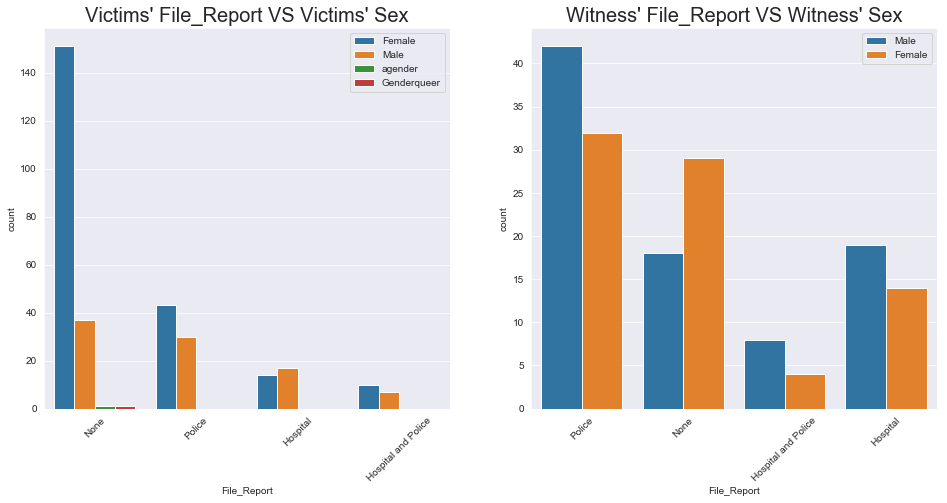

In [81]:
vicwit_plot_hue('File_Report','Sex')

File Report VS Sex plot: A large 48.55% of victims represents the females who seem not to file a report, either at a police station or a hospital. 11.9% represents the male in that category. On the witness side, 19.28% and 25.3% of female and male respectively represents the percentage that seem to prefer filing a report at the police station only.

# Part 3: No File Report Analysis  <a class="anchor" id="third-bullet"></a>

All along, we've focused on categorical columns, getting insights, correlations, causations from univariate and bivariate analysis. This section drifts from that. Here, the only non-categorical column - the No_File_Report column - is analysed.

### Preliminary <a class="anchor" id="t0"></a>

Let's have an overview of this column.

In [82]:
func('No_File_Report')

Number of Unique Elements in No_File_Report: 210
Unique Elements in No_File_Report: [nan
 "Was not sure of the detail I would need to go into. Didn't know if I would be denied."
 'I did not know at the time what was considered an assault. '
 "I was 15 and I shouldn't have been there anyway.  I thought it was my fault."
 'I was nervous and felt overwhelmed to make it “official” '
 'Discrimination' 'The victims has fear.'
 'i was a child and did not know any better'
 'It was a long time ago and I was a child at the time' 'make a complaint'
 'No' 'WE FEARED WHAT PEOPLE WILL THINK ABOUT US'
 'Underage when it happened and too afraid to talk. Besides authorities do not believe men can be raped by women'
 'Because neither places would believe me. He was a prominent figure in our community.'
 'I was afraid to file a complaint and then I would be hurt'
 'Too much to deal with'
 "I did not file a police report or go to the hospital because I was ashamed and I wanted to keep my rape a secret fro

The column contains subjective texts supplied by respondents stating differen individual reasons why they did not file a report having been victims and/or witnesses to sexual assault. We'd notice the presence of null value(s), and this could be attributed to the fact that the column is dependent on the File_Report column. Meaning, only respondents who were not able to file a report and were victims or witnesses to rape/sexual assault are eligible to fill this column.

Let's create a dataframe containing just respondents with entry into the No_File_Report column.

In [83]:
No_File = df[df['No_File_Report'].notnull()]
No_File.head(2)

,Timestamp,Age,Race,Sex,Own_Protection,Buy_Protection,Comm_DNA,Victim,Witness,File_Report,No_File_Report,Comfort
16,"Wednesday, 17 April 2019",18-25,White,Male,None,3,Yes,Maybe,No,None,Was not sure of the detail I would need to go ...,8.0
24,"Wednesday, 17 April 2019",18-25,Hispanic,Female,None,2,No,Maybe,Yes,None,I did not know at the time what was considered...,8.0


In [84]:
#Length of this dataframe
len(No_File)

227

There were 227 respondents that filled the No_File_Report column. It is expected that respondents that filled the No_File_Report column should have 'None' as the entry in the File_Report column. 

Recall,
* None - 'No, I  nor the victim did not go to the hospital or file a police report.'
* Police - 'Yes, I or the victim went to the police and filled a police report.'
* Hospital - 'Yes, I or the victim went to the hospital and received a sexual assault evidence kit.'
* Hospital and Police - 'Yes, I or the victim went to the hospital and received a sexual assault evidence kit AND filled a police report.'

Let's observe the spread of the File_Report column in this dataframe.

In [85]:
print('NaN values:', No_File['File_Report'].isnull().sum())
print(No_File['File_Report'].value_counts())

NaN values: 14
None                   157
Police                  30
Hospital                19
Hospital and Police      7
Name: File_Report, dtype: int64


Based on expectation, entries with 'None' should have the highest entry. But, on the other hand, we'd expect that entries 'Police', 'Hosital', and 'Hospital and Police' should not appear. We'd explore more to know why this is so. Also, null values are observed.

Let's deal with the null values.

In [86]:
#Extracting just the Null values of the File_Report column
File_Rep_NaN = No_File[No_File['File_Report'].isnull()]
File_Rep_NaN.head()

,Timestamp,Age,Race,Sex,Own_Protection,Buy_Protection,Comm_DNA,Victim,Witness,File_Report,No_File_Report,Comfort
69,"Wednesday, 17 April 2019",25-35,Asian/Pacific Islander,Female,None,3,No,No,No,NaN,No,7.0
179,"Thursday, 18 April 2019",25-35,Black,Male,None,2,No,No,No,NaN,I have never been assaulted.,3.0
274,"Friday, 19 April 2019",35-45,Asian/Pacific Islander,Male,None,1,No,No,No,NaN,I have never been victim or witnessed assault ...,7.0
348,"Saturday, 20 April 2019",25-35,Asian/Pacific Islander,Female,None,3,No,No,No,NaN,PERSONAL,9.0
355,"Saturday, 20 April 2019",18-25,White,Female,None,3,No,No,No,NaN,no sexual assault witnessed or experienced,6.0


In [87]:
#Length of this dataframe
len(File_Rep_NaN)

14

In [88]:
#Count of respondents with reasons why they did not file a report, but, have been victims and/or witnesses of rape/sexual assault. 
len(File_Rep_NaN[(File_Rep_NaN['Victim'] == 'Yes')|(File_Rep_NaN['Victim'] == 'Maybe')|(File_Rep_NaN['Witness'] == 'Yes')])

0

From the above, we can see that 14 respondents that have never been witnesses/victims, and rightly did not fill the File_Report column, went ahead to fill the No_File_Report column, that is, they had reasons why they didn't file a report, whereas, they appear neither to have been victims nor witnesses of rape/sexual assault. Obviously, these respondents have no effect on the No_File_Report column being analysed here, for this reason, these entries would be deleted. 

In [89]:
#Deleting the seemingly unnecessary entries
for i in File_Rep_NaN.index:
    No_File.drop(i,axis=0,inplace=True)

There are also possibilities of random entries in the File_Report column and/or No_File_Report column without respondents being victims or witnesses. Let's have an overview of these respondents.

In [90]:
To_Drop = No_File[(No_File['Victim'] == 'No')&(No_File['Witness'] == 'No')]
To_Drop.head(3)

,Timestamp,Age,Race,Sex,Own_Protection,Buy_Protection,Comm_DNA,Victim,Witness,File_Report,No_File_Report,Comfort
50,"Thursday, 18 April 2019",18-25,White,Female,None,2,No,No,No,Police,The victims has fear.,6.0
147,"Thursday, 18 April 2019",25-35,Asian/Pacific Islander,Female,None,3,No,No,No,None,Because I was not a victim of sexual assault.,4.0
217,"Wednesday, 17 April 2019",35-45,Black,Male,None,3,No,No,No,None,BECAUSE IT DID NOT HAPPENED TO ME,9.0


In [91]:
len(To_Drop)

24

It appears these respondents stated in the No_File_Report column that they have not been a victim/witness of sexual assault. It's rather a case of respondents not taking note of the instruction on the survey. These entries too would have to be deleted for they do not represent true respondents that have been victims/witnesses to sexual assault.

In [92]:
#Deleting the To_Drop rows
for i in To_Drop.index:
    No_File.drop(i,axis=0,inplace=True)

In [93]:
#New length of the No_File dataframe
len(No_File)

189

As a norm, we'd go ahead to define necessary functions

In [94]:
#Function that outputs the length of the dataframe, value count of each unique element in percentage, and its corresponding countplot.
def No_File_plot(col, title):
    col in No_File.columns
    length = len(No_File)
    val_count_norm = No_File[col].value_counts(normalize=True).apply(lambda x:str(round((x*100),2))+'%')
    plot = sns.countplot(x=No_File[col])
    plt.title(title, fontsize = 20)
    print('Length of DataFrame: {}'.format(length))
    print(50*'-')
    print('Value Counts in Percentage of Unique Elements in {}:\n{}'.format(col,val_count_norm))
    return plot

NaN values: 0
Length of DataFrame: 189
--------------------------------------------------
Value Counts in Percentage of Unique Elements in File_Report:
None                   75.13%
Police                 13.76%
Hospital                8.99%
Hospital and Police     2.12%
Name: File_Report, dtype: object


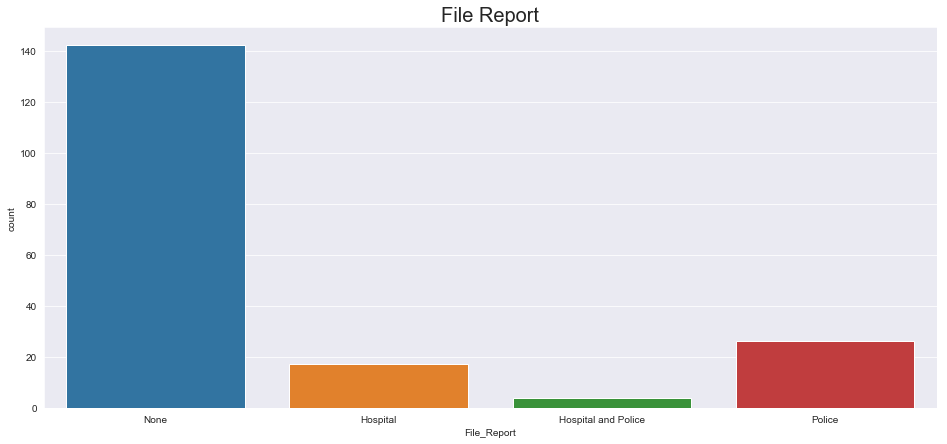

In [95]:
print('NaN values:', No_File['File_Report'].isnull().sum())
No_File_plot('File_Report','File Report')

File Report Plot: 75.13% of respondents who stated reasons why they did not file a report, truly did not file a report. But, about 24.87% of these respondents actually did file a report. How possible??! 

Let's have an overview of the these respondents that filed a report at the police station and/or a hospital, and still went ahead to specify reasons why they didn't report an incidence.

In [96]:
both_Report = No_File[(No_File['File_Report'] == 'Police')|(No_File['File_Report'] == 'Hospital')|(No_File['File_Report'] == 'Hospital and Police')]
both_Report.head(3)

,Timestamp,Age,Race,Sex,Own_Protection,Buy_Protection,Comm_DNA,Victim,Witness,File_Report,No_File_Report,Comfort
63,"Wednesday, 17 April 2019",25-35,Asian/Pacific Islander,Male,None,2,Yes,Yes,Yes,Hospital,make a complaint,9.0
114,"Wednesday, 17 April 2019",25-35,White,Male,None,1,No,No,Yes,Hospital and Police,"We did go to the hospital, and it was on the v...",2.0
177,"Thursday, 18 April 2019",25-35,White,Female,None,3,No,Yes,No,Hospital,because it was a friend,6.0


In [97]:
#Count of repondents that filed a report at the police and/or hospital, and still went ahead to state a reason why they did not report
len(both_Report)

47

This confirms that there were 47 respondents that filed reports for rape/sexual assault case(s) and also gave reasons why they didn't file a report. Pretty confusing!! But, there are possible cases for such respondent; Maybe respondent has been a victim or witness multiple times and he/she did not report all occurrences. Another case could be that, respondent was just a witness to an incidence, and victim did not follow respondent to file a report, therefore the entry into the No_File_Report column, explains the case for the victim. Since these and some other possilities are logical explanation for these entries, we would continue the analysis with them.

Before analysis is done on the No_File_Report column, let's get necessary countplots with this new dataframe. 

### Age <a class="anchor" id="t1"></a>

Length of DataFrame: 189
--------------------------------------------------
Value Counts in Percentage of Unique Elements in Age:
25-35       43.92%
18-25       22.75%
35-45       20.63%
45-55        7.94%
55+          4.23%
Under 18     0.53%
Name: Age, dtype: object


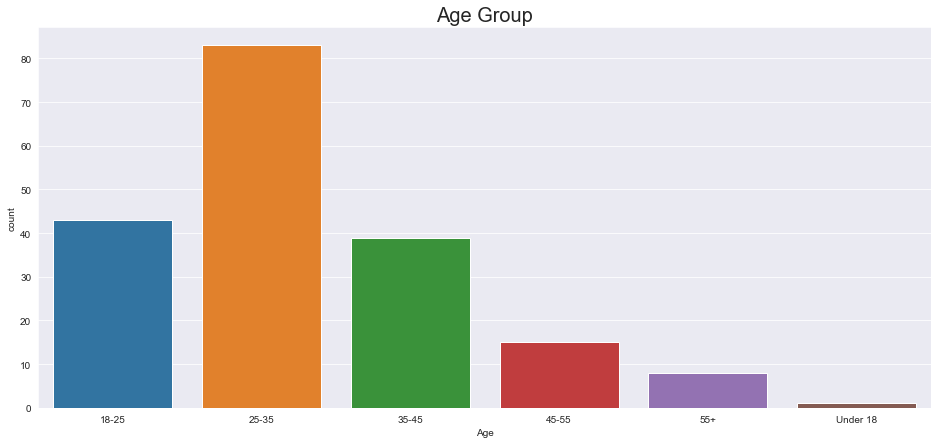

In [98]:
#Countplot of Age
No_File_plot('Age','Age Group')

Age Plot: About 44% of respondents who did not file a report are within the ages 25-35. Apparently, majority of respondents from this group from univariate and bivariate analysis done above, seem to be very uncomfortable with authorities. Little wonder they top the No_File_Report column entries.

### Race <a class="anchor" id="t2"></a>

Length of DataFrame: 189
--------------------------------------------------
Value Counts in Percentage of Unique Elements in Race:
White                           59.79%
Asian/Pacific Islander          19.58%
Black                           10.05%
Hispanic                         5.82%
American Indian/Aleut/Eskimo     3.17%
Other                            1.59%
Name: Race, dtype: object


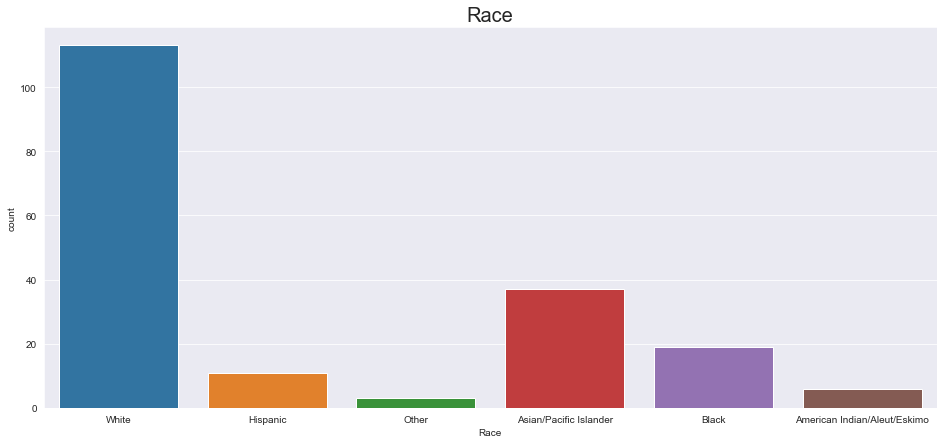

In [99]:
#Countplot of Race
No_File_plot('Race','Race')

Race Plot: Likewise, analysis done above proves the White to be seemingly uncomfortable with authorities. Unsurprisingly, they record about 60% of this section. 

### Sex <a class="anchor" id="t3"></a>

Length of DataFrame: 189
--------------------------------------------------
Value Counts in Percentage of Unique Elements in Sex:
Female         66.67%
Male           32.28%
agender         0.53%
Genderqueer     0.53%
Name: Sex, dtype: object


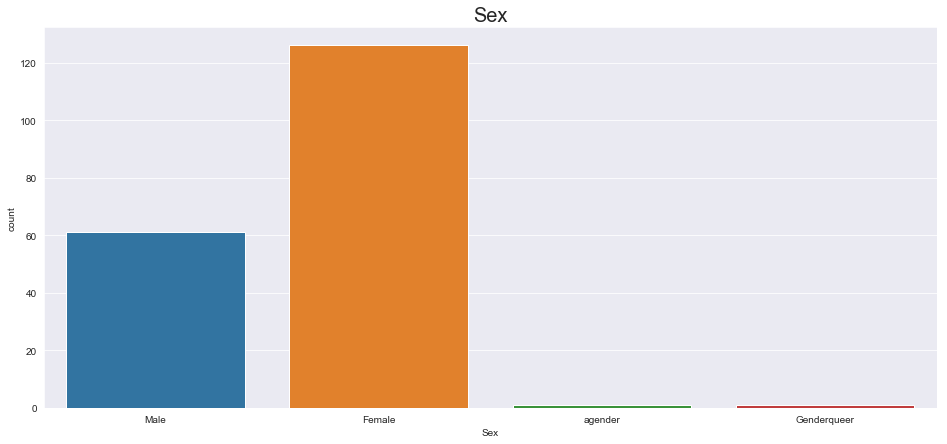

In [100]:
No_File_plot('Sex','Sex')

Sex Plot: Expectedly, 66.67% of entries in this section appear to be from females.

In [101]:
#Overview of dataframe
No_File.head(3)

,Timestamp,Age,Race,Sex,Own_Protection,Buy_Protection,Comm_DNA,Victim,Witness,File_Report,No_File_Report,Comfort
16,"Wednesday, 17 April 2019",18-25,White,Male,None,3,Yes,Maybe,No,None,Was not sure of the detail I would need to go ...,8.0
24,"Wednesday, 17 April 2019",18-25,Hispanic,Female,None,2,No,Maybe,Yes,None,I did not know at the time what was considered...,8.0
28,"Wednesday, 17 April 2019",18-25,White,Female,None,2,No,Yes,No,None,I was 15 and I shouldn't have been there anywa...,7.0


Since the No_File_Report is not a categorical column like the other column, instead a column with subjective text based on various individuals, another means of analysis would be done on this column.

### Natural Language Processing on the No_File_Report column <a class="anchor" id="t4"></a>

Human language is highly ambiguous. It is also ever changing and evolving. People are great at producing language and understanding language, and are capable of expressing, perceiving, and interpreting very elaborate and nuanced meanings. At the same time, while we humans are great users of language, we are also very poor at formally understanding and describing the rules that govern language.
NLP is an ongoing attempt to capture those structures and rules.

Wikipedia quotes on NLP - 
"Natural language processing (NLP) is a field of computer science, artificial intelligence and computational linguistics concerned with the interactions between computers and human (natural) languages, and, in particular, concerned with programming computers to fruitfully process large natural language corpora."

As a result, the Natural Language Processing technique would be applied on the No_File_Report column to get insights as to why respondents do not file a report at a police station or a hospital. 

In [102]:
#Instantiating the column 
text = No_File['No_File_Report']

Let's make a new column to detect how long the texts are:

In [103]:
#Length of text for each entry
No_File['No_File_Rep_Len'] = text.apply(len)

Let's visualize this!

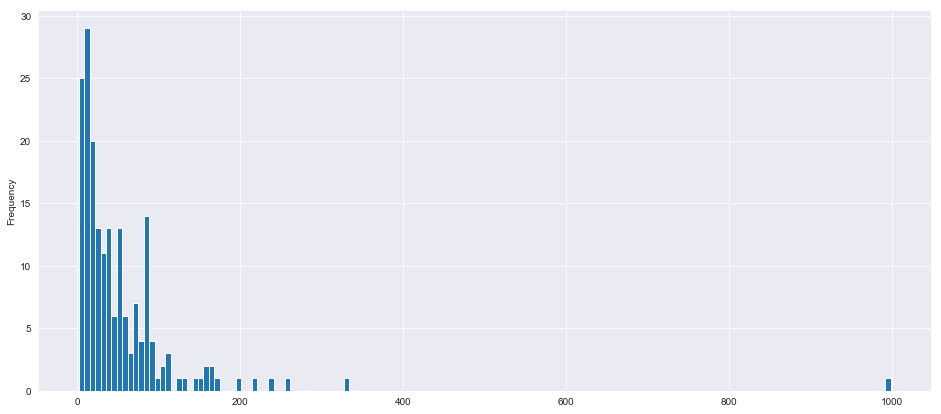

In [104]:
No_File['No_File_Rep_Len'].plot(kind='hist',bins=150)

It looks like majority text are not very long and are below 100. However, we can see that the x-axis goes up to 1000. Seems like a text extends to that length. Let's get more info about this text.

In [105]:
No_File['No_File_Rep_Len'].max()

998

Woah! 998 characters!! That's some thesis length. Let's use masking to find this message.

In [106]:
No_File[No_File['No_File_Rep_Len'] == 998]

,Timestamp,Age,Race,Sex,Own_Protection,Buy_Protection,Comm_DNA,Victim,Witness,File_Report,No_File_Report,Comfort,No_File_Rep_Len
447,"Sunday, 21 April 2019",35-45,White,Female,None,0,No,Yes,No,None,I have PTSD from childhood. I was also goth. I...,1.0,998


Sadly, a white female respondent who appears to have been a victim of rape/sexual assault. Comfort column also reads 1.0, implying that this respondent doesn't seem comfortable reporting to authorities.

Let's see what the message entails.

In [107]:
No_File[No_File['No_File_Rep_Len'] == 998]['No_File_Report'].iloc[0]

"I have PTSD from childhood. I was also goth. It was someone I had just broken up with that looked fairly normal. I dissociated when it happened and I was working a job that fired anyone that called in sick for a shift. I had to work that night or I'd lose my home. A friend that it happened to three years before that was humiliated by the police then bullied by most of the student body for going to the police about it. Another just prior went through the humiliation with the police and was told they didn't know where he was and weren't going to find him. I didn't want to go through further humiliation just to be called accused of lying by the police. I stayed dissociated for a year instead. It took me 15 years to realize that I'm gay with *very* rare exceptions because of the feeling of shame and disgust every time I had sexual contact with a man after that. I though it was from the rape until my marriage failed and the thought of kissing a man nauseates me, women on the other hand..."

Pathetic! Let's move on with the analysis.

### Text Pre-processing <a class="anchor" id="t41"></a>

Our main issue with our data is that it is all in text format (strings). 

##### Tokenization 

Tokenization breaks unstructured data, text, into chunks of information which can be counted as discrete elements. This immediately turns an unstructured string (text document) into a more usable data, which can be further structured,and made more suitable for machine learning.

##### StopWords 

Consider words like a, an, the, be etc. These words don't add any extra information in a sentence. Such words can often create noise while modeling. Such words are known as Stop Words.
Generally there is a standard list of stop words and that list is also included within the NLTK. To do this we will take advantage of the NLTK library. It's pretty much the standard library in Python for processing text and has a lot of useful features. 

##### Stemming And Lemmatization

Consider following words: Copy, copied, copying.
Although they represent the same meaning, if not treated, our model might treat them differently. So we tend to strip such words to their core. We can do that by stemming or lemmatisation.
Stemming and Lemmatization are the basic text processing methods for English text. The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.

Let's create a function, first, we tokenize using RegexpTokenizer() tokenizer which will match any word characters until it reaches a non-word character, like white a space, then, we'll also remove very common words, otherwise called stopwords, ('the', 'a', etc..), followed by stemming and lemmanization. The texts process the string in the message column, then we can just use **apply()** in pandas do process all the text in the DataFrame.

In [108]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud
import string
from nltk.corpus import stopwords
def text_process(text):
    
    tokenizer = RegexpTokenizer(r'\w+')
    toke = tokenizer.tokenize(text)
    
    tok_text = []
    stop = [i for i in toke]
    for word in stop:
        if word.lower() not in stopwords.words('english'):
            lemmatizer = WordNetLemmatizer()
            lemmatizer.lemmatize(word.lower())
            porter_stemmer = PorterStemmer()
            tok_text.append(porter_stemmer.stem(word))
            
    return tok_text

In [109]:
#Calling the function on the No_File_Report column
tok = No_File['No_File_Report'].apply(text_process)
tok.head()

16    [sure, detail, would, need, go, know, would, d...
24                        [know, time, consid, assault]
28                         [15, anyway, thought, fault]
35              [nervou, felt, overwhelm, make, offici]
47                                          [discrimin]
Name: No_File_Report, dtype: object

In [110]:
#Combining all words to generate one text
comment_words = ' '
for i in tok.index:
    for words in tok[i]:
        comment_words = comment_words + words + ' '

In [111]:
#Overview of text
comment_words

' sure detail would need go know would deni know time consid assault 15 anyway thought fault nervou felt overwhelm make offici discrimin child know better long time ago child time make complaint fear peopl think US underag happen afraid talk besid author believ men rape women neither place would believ promin figur commun afraid file complaint would hurt much deal file polic report go hospit asham want keep rape secret everyon also think anyth polic could help case work law enforc time would caus complic job want hassl bureaucraci attach file report respect go hospit victim request file polic due shyness polic offic ask unnecessari question scare 11 famili member rest famili care embarrass scare time past denial open talk past time period thing could done legal friend molest mom friend son abround 4 year old babysit decid around anymor young understand happen memori earli childhood sexual assault rememb specif detail extrem foggi even 100 sure realli happen plu realli want revisit fact

### WordCloud <a class="anchor" id="t42"></a>

Text(0.5,1,'No_File_Report WordCloud')

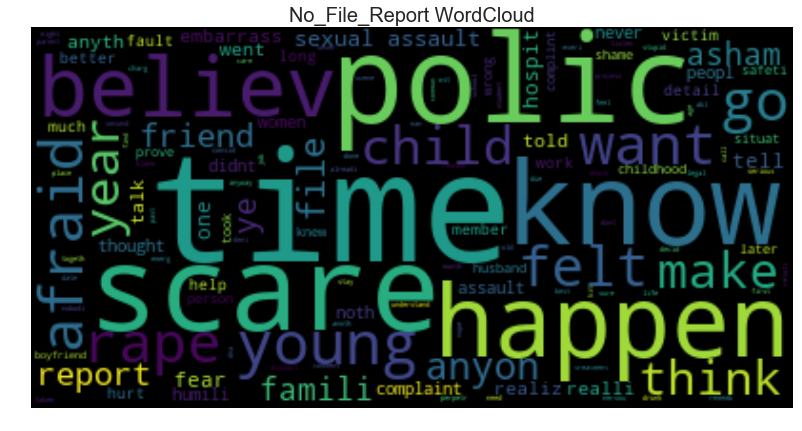

In [112]:
#Plot of wordcloud
wordcloud = WordCloud().generate(comment_words)
plt.figure(figsize=(16, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('No_File_Report WordCloud',fontsize=20)

No_File_Report WordCloud Plot: Word cloud helps us understand how different words are distributed across the text. The most occurring words will have larger sizes, and vice versa. 

As can be seen, this particular wordcloud strongly suggest the reasons why most victims and/or witnesses of sexual assault do not report cases. We'd analyse the major words represented by the wordcloud in a short passage with the most occurring words in bold.

Being sexually assaulted is one of the most shame-inducing traumas that a person can experience. Victims are too **ashamed** to come forward. It is no news that **sexual assault** by its nature is humiliating and dehumanizing. Victims often **feel** invaded, defiled and even **fear** of **embarrassment**. Sometimes, victims are **afraid** or **scared** of being blamed. This is often the culture in which assumptions are made that if something bad happens to you, it is somehow your own fault. For example, a victim who was probably raped at night. Statements like, "She shouldn't have gone for the night party", "What does she expect when she wears a short dress", etc. And, with all sincerity, this can be emotionally and psychologically damaging to the victims. 

Some other **times**, victims are **afraid** or **scared** that they might not be **believed**. Sexual assault victims sometime, do not **feel** or **believe** or **think** anything good would come out of **reporting**. This is a case where the **Police** and every other related authority are not trusted enough, thus, a reason for these authorities to up their game and make victims understand that they can be trusted and all effort would be put to ensure that justice is achieved. 

Victims at **times** often **feel** too **young** and do not **know** how to **go** about making **reports** or who to **tell**. In such events, public enlightenment could serve as a critical tool in changing the behaviour, attitude, and beliefs of people, especially at a young age. Therefore, there should be intense public enlightenment and education at schools, social clubs, gatherings, churches, mosques and through the media, to first of all, demystify the myths about sexual assault.  